## hypothesis success: people and ratings

Grafo: vértices->pessoas; 

aresta entre duas pessoas caso tenham trabalhado juntas; 

a espessura da aresta é tanto maior quanto maior for o nº de filmes em comum 

In [1]:
# libraries
library(igraph)
library(plyr)
library(ggplot2)


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [101]:
options(repr.plot.width=20, repr.plot.height=18, repr.plot.res = 200)

In [2]:
# filtered name basics containing only actors and actresses
names = read.csv('./../dataset/name_basics_actors_actresses.csv',header=TRUE)

In [3]:
head(names)

nconst    primaryName     primaryProfession1 primaryProfession2
1 nm0000002 Lauren Bacall   actress            soundtrack        
2 nm0000003 Brigitte Bardot actress            soundtrack        
3 nm0000004 John Belushi    actor              soundtrack        
4 nm0000006 Ingrid Bergman  actress            soundtrack        
5 nm0000007 Humphrey Bogart actor              soundtrack        
6 nm0000008 Marlon Brando   actor              soundtrack        
  primaryProfession3 knownForTitles1 knownForTitles2 knownForTitles3
1 0                  tt0117057       tt0071877       tt0038355      
2 music_department   tt0049189       tt0054452       tt0057345      
3 writer             tt0072562       tt0077975       tt0078723      
4 producer           tt0034583       tt0036855       tt0038787      
5 producer           tt0037382       tt0034583       tt0040897      
6 director           tt0070849       tt0078788       tt0047296      
  knownForTitles4 isDead
1 tt0037382       1     
2 tt0059956       0     
3 tt0080455       1     
4 tt0038109       1     
5 tt0043265       1     
6 tt0068646       1

In [4]:
df = data.frame(nconst=rep(names$nconst, times=4), knownForTitles=NA)

In [5]:
nrow(names)
nrow(df)
head(df)

[1] 691130

[1] 2764520

nconst    knownForTitles
1 nm0000002 NA            
2 nm0000003 NA            
3 nm0000004 NA            
4 nm0000006 NA            
5 nm0000007 NA            
6 nm0000008 NA

In [6]:
head(names[,6:9])

knownForTitles1 knownForTitles2 knownForTitles3 knownForTitles4
1 tt0117057       tt0071877       tt0038355       tt0037382      
2 tt0049189       tt0054452       tt0057345       tt0059956      
3 tt0072562       tt0077975       tt0078723       tt0080455      
4 tt0034583       tt0036855       tt0038787       tt0038109      
5 tt0037382       tt0034583       tt0040897       tt0043265      
6 tt0070849       tt0078788       tt0047296       tt0068646

#### get knownForTitles1, knownForTitles2, knownForTitles3 and knownForTitles4 in one list

In [7]:
knownForTitles = c()
for( col in names[,6:9]){
   col=as.vector(col)
   knownForTitles = c(knownForTitles, col)
}
df$knownForTitles = knownForTitles

In [8]:
# convert it to factor
df$knownForTitles = factor(df$knownForTitles)

In [9]:
head(df)
tail(df)

nconst    knownForTitles
1 nm0000002 tt0117057     
2 nm0000003 tt0049189     
3 nm0000004 tt0072562     
4 nm0000006 tt0034583     
5 nm0000007 tt0037382     
6 nm0000008 tt0070849

nconst    knownForTitles
2764515 nm9993616 0             
2764516 nm9993636 tt10842376    
2764517 nm9993680 0             
2764518 nm9993693 0             
2764519 nm9993694 tt9097592     
2764520 nm9993703 tt11212278

In [10]:
# order by movie
ordered_df = df[order(df$knownForTitles),]

In [11]:
head(ordered_df)

nconst    knownForTitles
691396 nm0000335 0             
691672 nm0000665 0             
692468 nm0001664 0             
693027 nm0003597 0             
693339 nm0004897 0             
693395 nm0004982 0

In [12]:
#percentage of persons without movie, dued to not all knownForTitles columns were filled
nrow(ordered_df[ordered_df$knownForTitles==0,])/nrow(ordered_df)

[1] 0.3163052

In [13]:
# remove those columns
cleaned_df = ordered_df[ordered_df$knownForTitles!=0,]
cleaned_df$knownForTitles = factor(cleaned_df$knownForTitles)

In [14]:
head(cleaned_df)

nconst    knownForTitles
78092   nm0443482 tt0000005     
111896  nm0653042 tt0000005     
35495   nm0183947 tt0000007     
13848   nm0063086 tt0000009     
1417723 nm0183823 tt0000009     
1615447 nm1309758 tt0000009

#### graphs

In [15]:
# split by movie, result is different dataframes each refers to one movie with persons that worked for that movie
split_df = split(cleaned_df, cleaned_df$knownForTitles)

In [16]:
length(split_df)
str(cleaned_df$knownForTitles)

[1] 668563

 Factor w/ 668563 levels "tt0000005","tt0000007",..: 1 1 2 3 3 3 4 4 5 6 ...


In [17]:
split_df[1]

$tt0000005
          nconst knownForTitles
78092  nm0443482      tt0000005
111896 nm0653042      tt0000005

In [18]:
# combination_matrix = c()
#for( i in 1:length(split_df))
# for( i in 1:100){
#     if(length(split_df[[i]][[1]]) > 1){ # does not consider movies that only one person is known for (messes with the structure)
#         temp = combn(as.vector(split_df[[i]][[1]]), 2)  # combinations without repetions with persons that worked in the same movie
#                                                         # so we have the connections for the graph
#         combination_matrix = cbind(combination_matrix, temp)
#         #print(i)
#     }
# }

In [19]:
#combination_matrix

In [20]:
#library(igraph)

In [21]:
# relations <- data.frame(from=combination_matrix[1,],
#                         to=combination_matrix[2,]
#                         )
# g <- graph_from_data_frame(relations, directed=FALSE)
# plot(g)

#### is impossible to present everything in one graph... lets know a bit more of the dataset to filter it

In [22]:
#library(plyr)

In [23]:
freq_persons_df = count(cleaned_df, "nconst")

In [24]:
nrow(freq_persons_df)

[1] 691130

In [25]:
head(freq_persons_df)

nconst    freq
1 nm0000002 4   
2 nm0000003 4   
3 nm0000004 4   
4 nm0000006 4   
5 nm0000007 4   
6 nm0000008 4

In [26]:
#library(ggplot2)

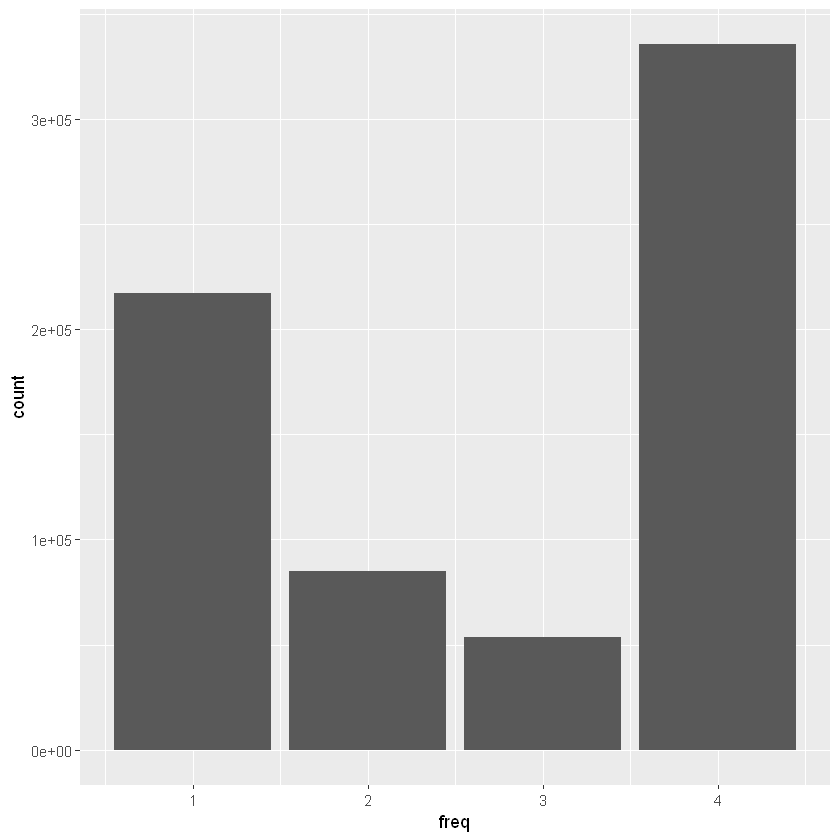

In [27]:
ggplot(freq_persons_df, aes(x=freq)) + geom_bar()

In [28]:
freq_titles_df = count(cleaned_df, "knownForTitles")

In [29]:
nrow(freq_titles_df)

[1] 668563

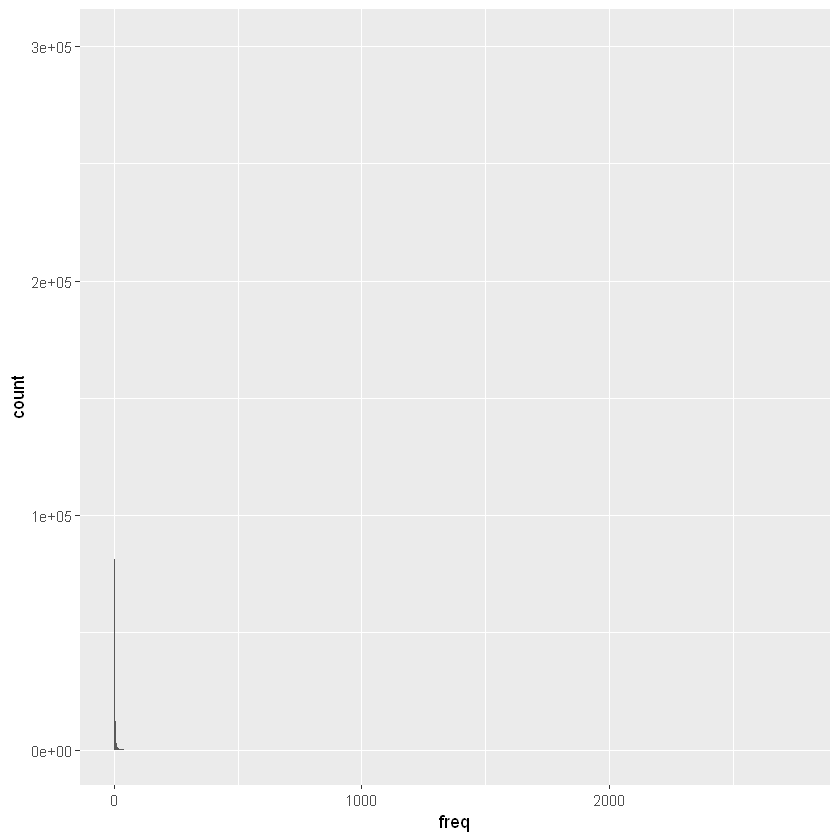

In [30]:
ggplot(freq_titles_df, aes(x=freq)) + geom_bar()

In [31]:
freq_titles_df[freq_titles_df$freq>500,]

knownForTitles freq
27019  tt0053494       646
29018  tt0056758       513
30283  tt0058796       571
47515  tt0088512       722
47556  tt0088580       502
51384  tt0094481       506
54068  tt0098844       790
60074  tt0108709       512
96440  tt0198093       674
98463  tt0203259      1112
109251 tt0241383       513
127775 tt0297174       728
149259 tt0364845       510
164841 tt0413573       537
173525 tt0441074       749
176949 tt0452046       812
182274 tt0472642       582
195564 tt0806910      2756
210259 tt0989125       528
328841 tt1595859       513

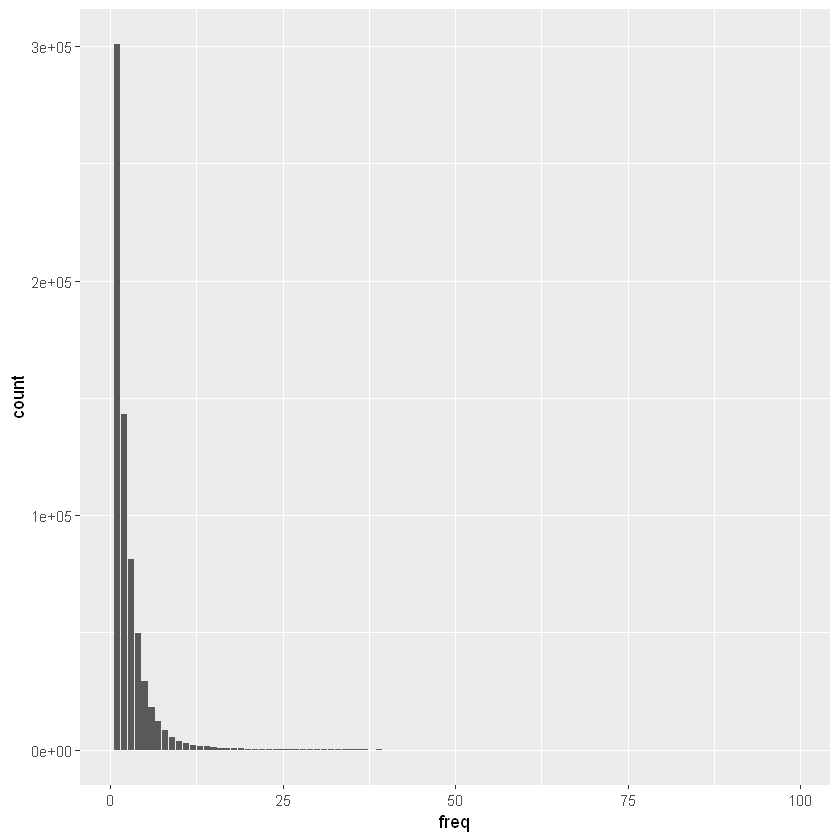

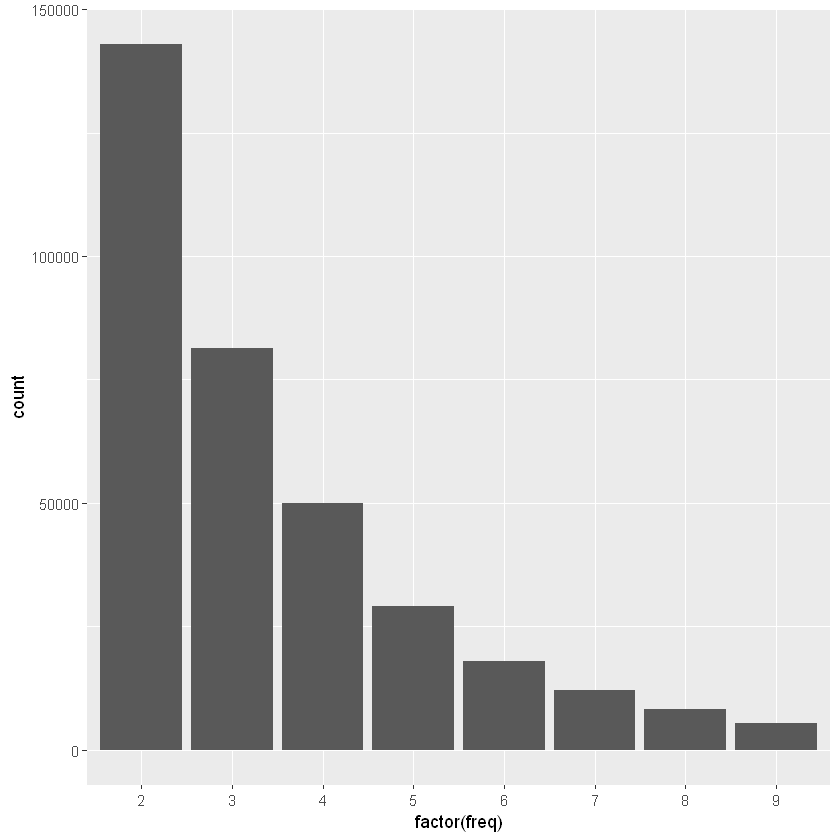

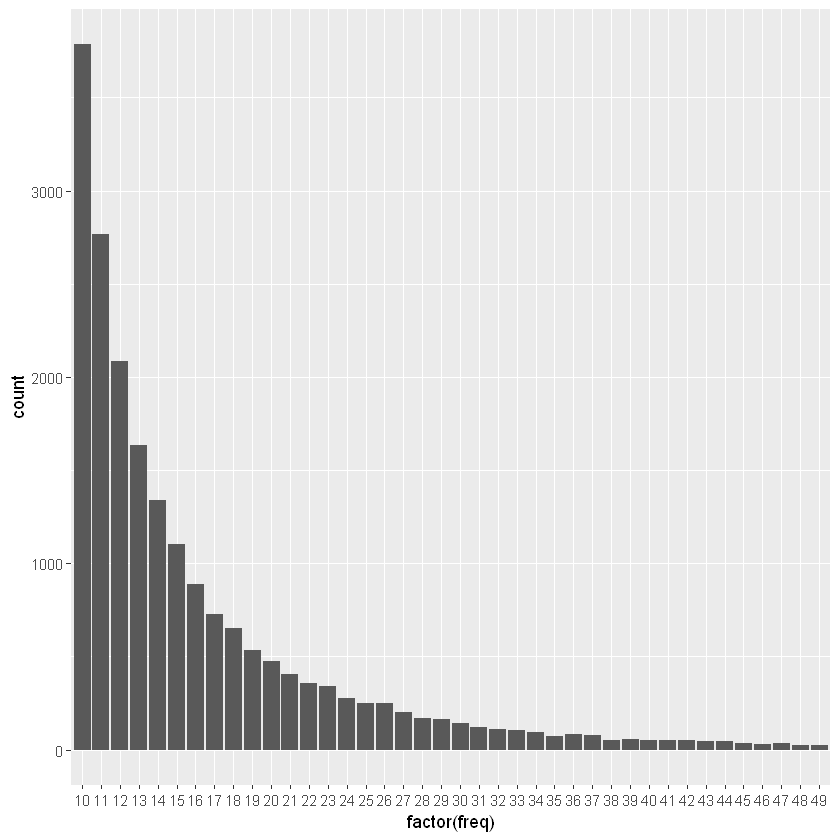

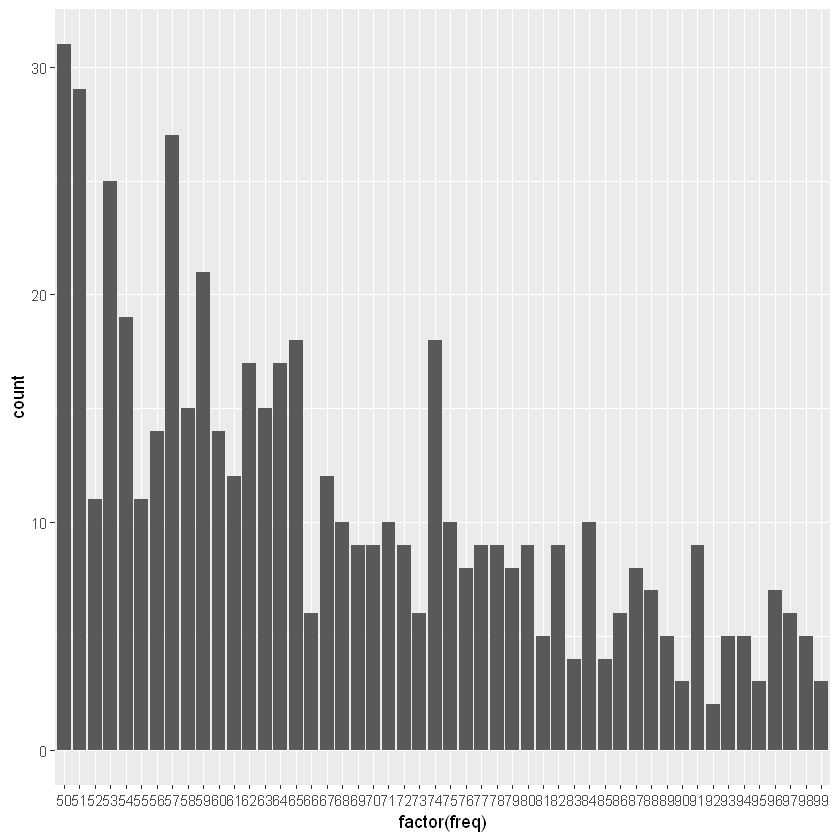

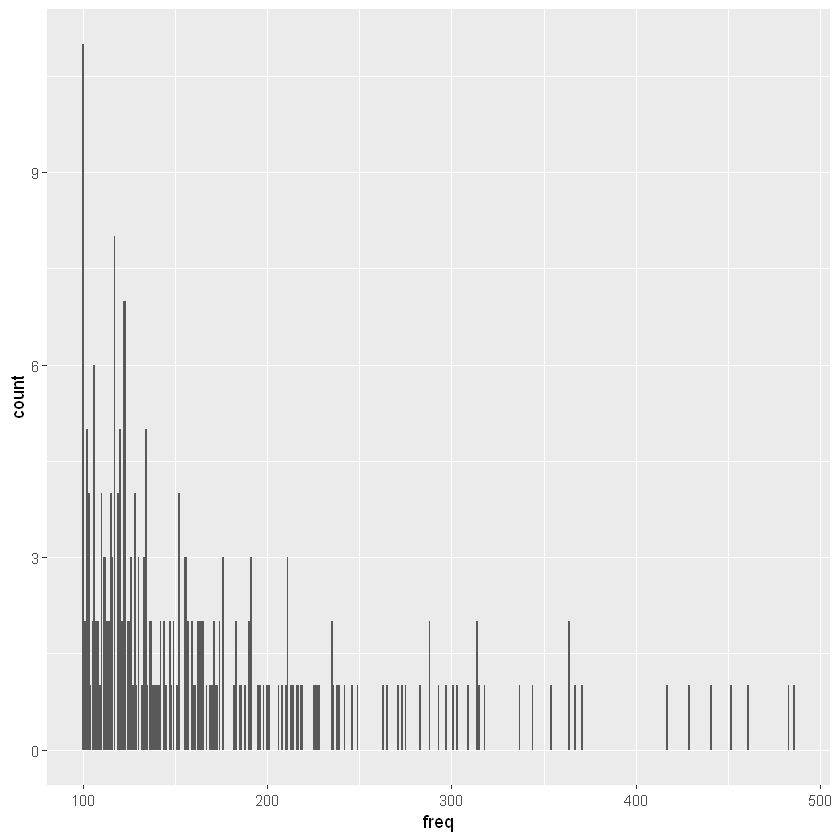

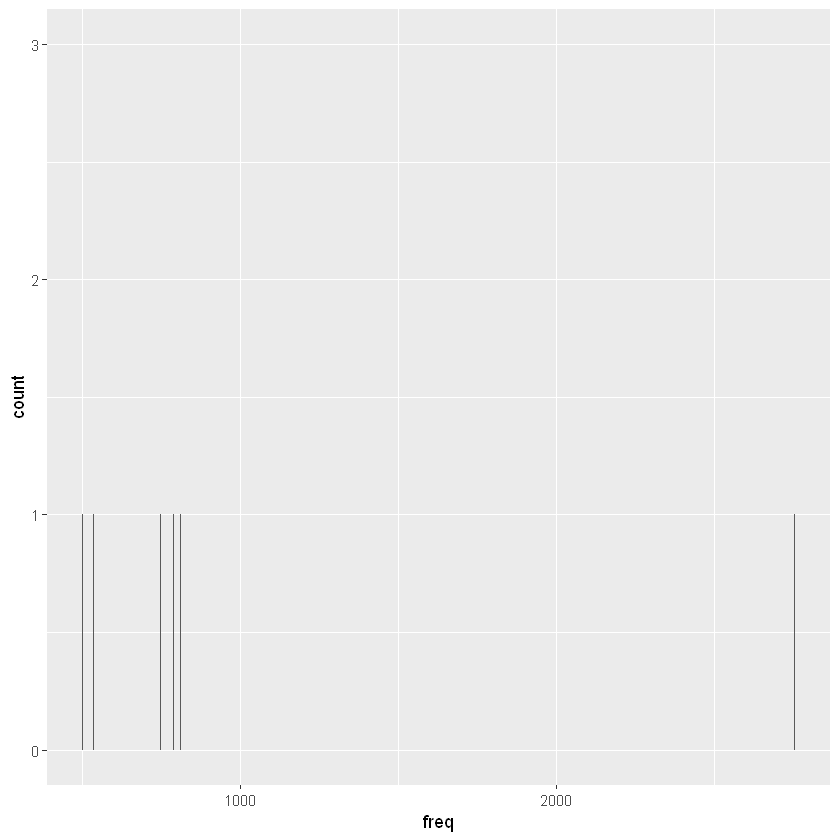

In [32]:
# frequence = number of people known by that movie
# the bar plots show the amout of movies (y axis) per number of people known by that movie (x axis)

ggplot(freq_titles_df[freq_titles_df$freq<100,], aes(x=freq)) + geom_bar() #+ scale_y_continuous(limits = c(0,300000))

ggplot(freq_titles_df[freq_titles_df$freq>1 & freq_titles_df$freq<10,], aes(x=factor(freq))) + geom_bar()
ggplot(freq_titles_df[freq_titles_df$freq>=10 & freq_titles_df$freq<50,], aes(x=factor(freq))) + geom_bar()
ggplot(freq_titles_df[freq_titles_df$freq>=50 & freq_titles_df$freq<100,], aes(x=factor(freq))) + geom_bar()
ggplot(freq_titles_df[freq_titles_df$freq>=100 & freq_titles_df$freq<500,], aes(x=freq)) + geom_bar()
ggplot(freq_titles_df[freq_titles_df$freq>=500,], aes(x=freq)) + geom_bar()

#### Movies that have 100 persons that are known for that movie

In [33]:
df_100 = cleaned_df[cleaned_df$knownForTitles %in% freq_titles_df[freq_titles_df$freq==100,]$knownForTitles, ]

In [34]:
df_100$knownForTitles = factor(df_100$knownForTitles)

In [35]:
# split by movie, result is different dataframes each refers to one movie with persons that worked for that movie
split_df_100 = split(df_100, df_100$knownForTitles)

In [36]:
length(split_df_100)

[1] 11

In [37]:
combination_matrix_100 = c()
for( i in 1:length(split_df_100)){
#for( i in 1:100){
    if(length(split_df_100[[i]][[1]]) > 1){ # does not consider movies that only one person is known for (messes with the structure)
        temp = combn(as.vector(split_df_100[[i]][[1]]), 2)  # combinations without repetions with persons that worked in the same movie
                                                        # so we have the connections for the graph
        combination_matrix_100 = cbind(combination_matrix_100, temp)
        #print(i)
    }
}

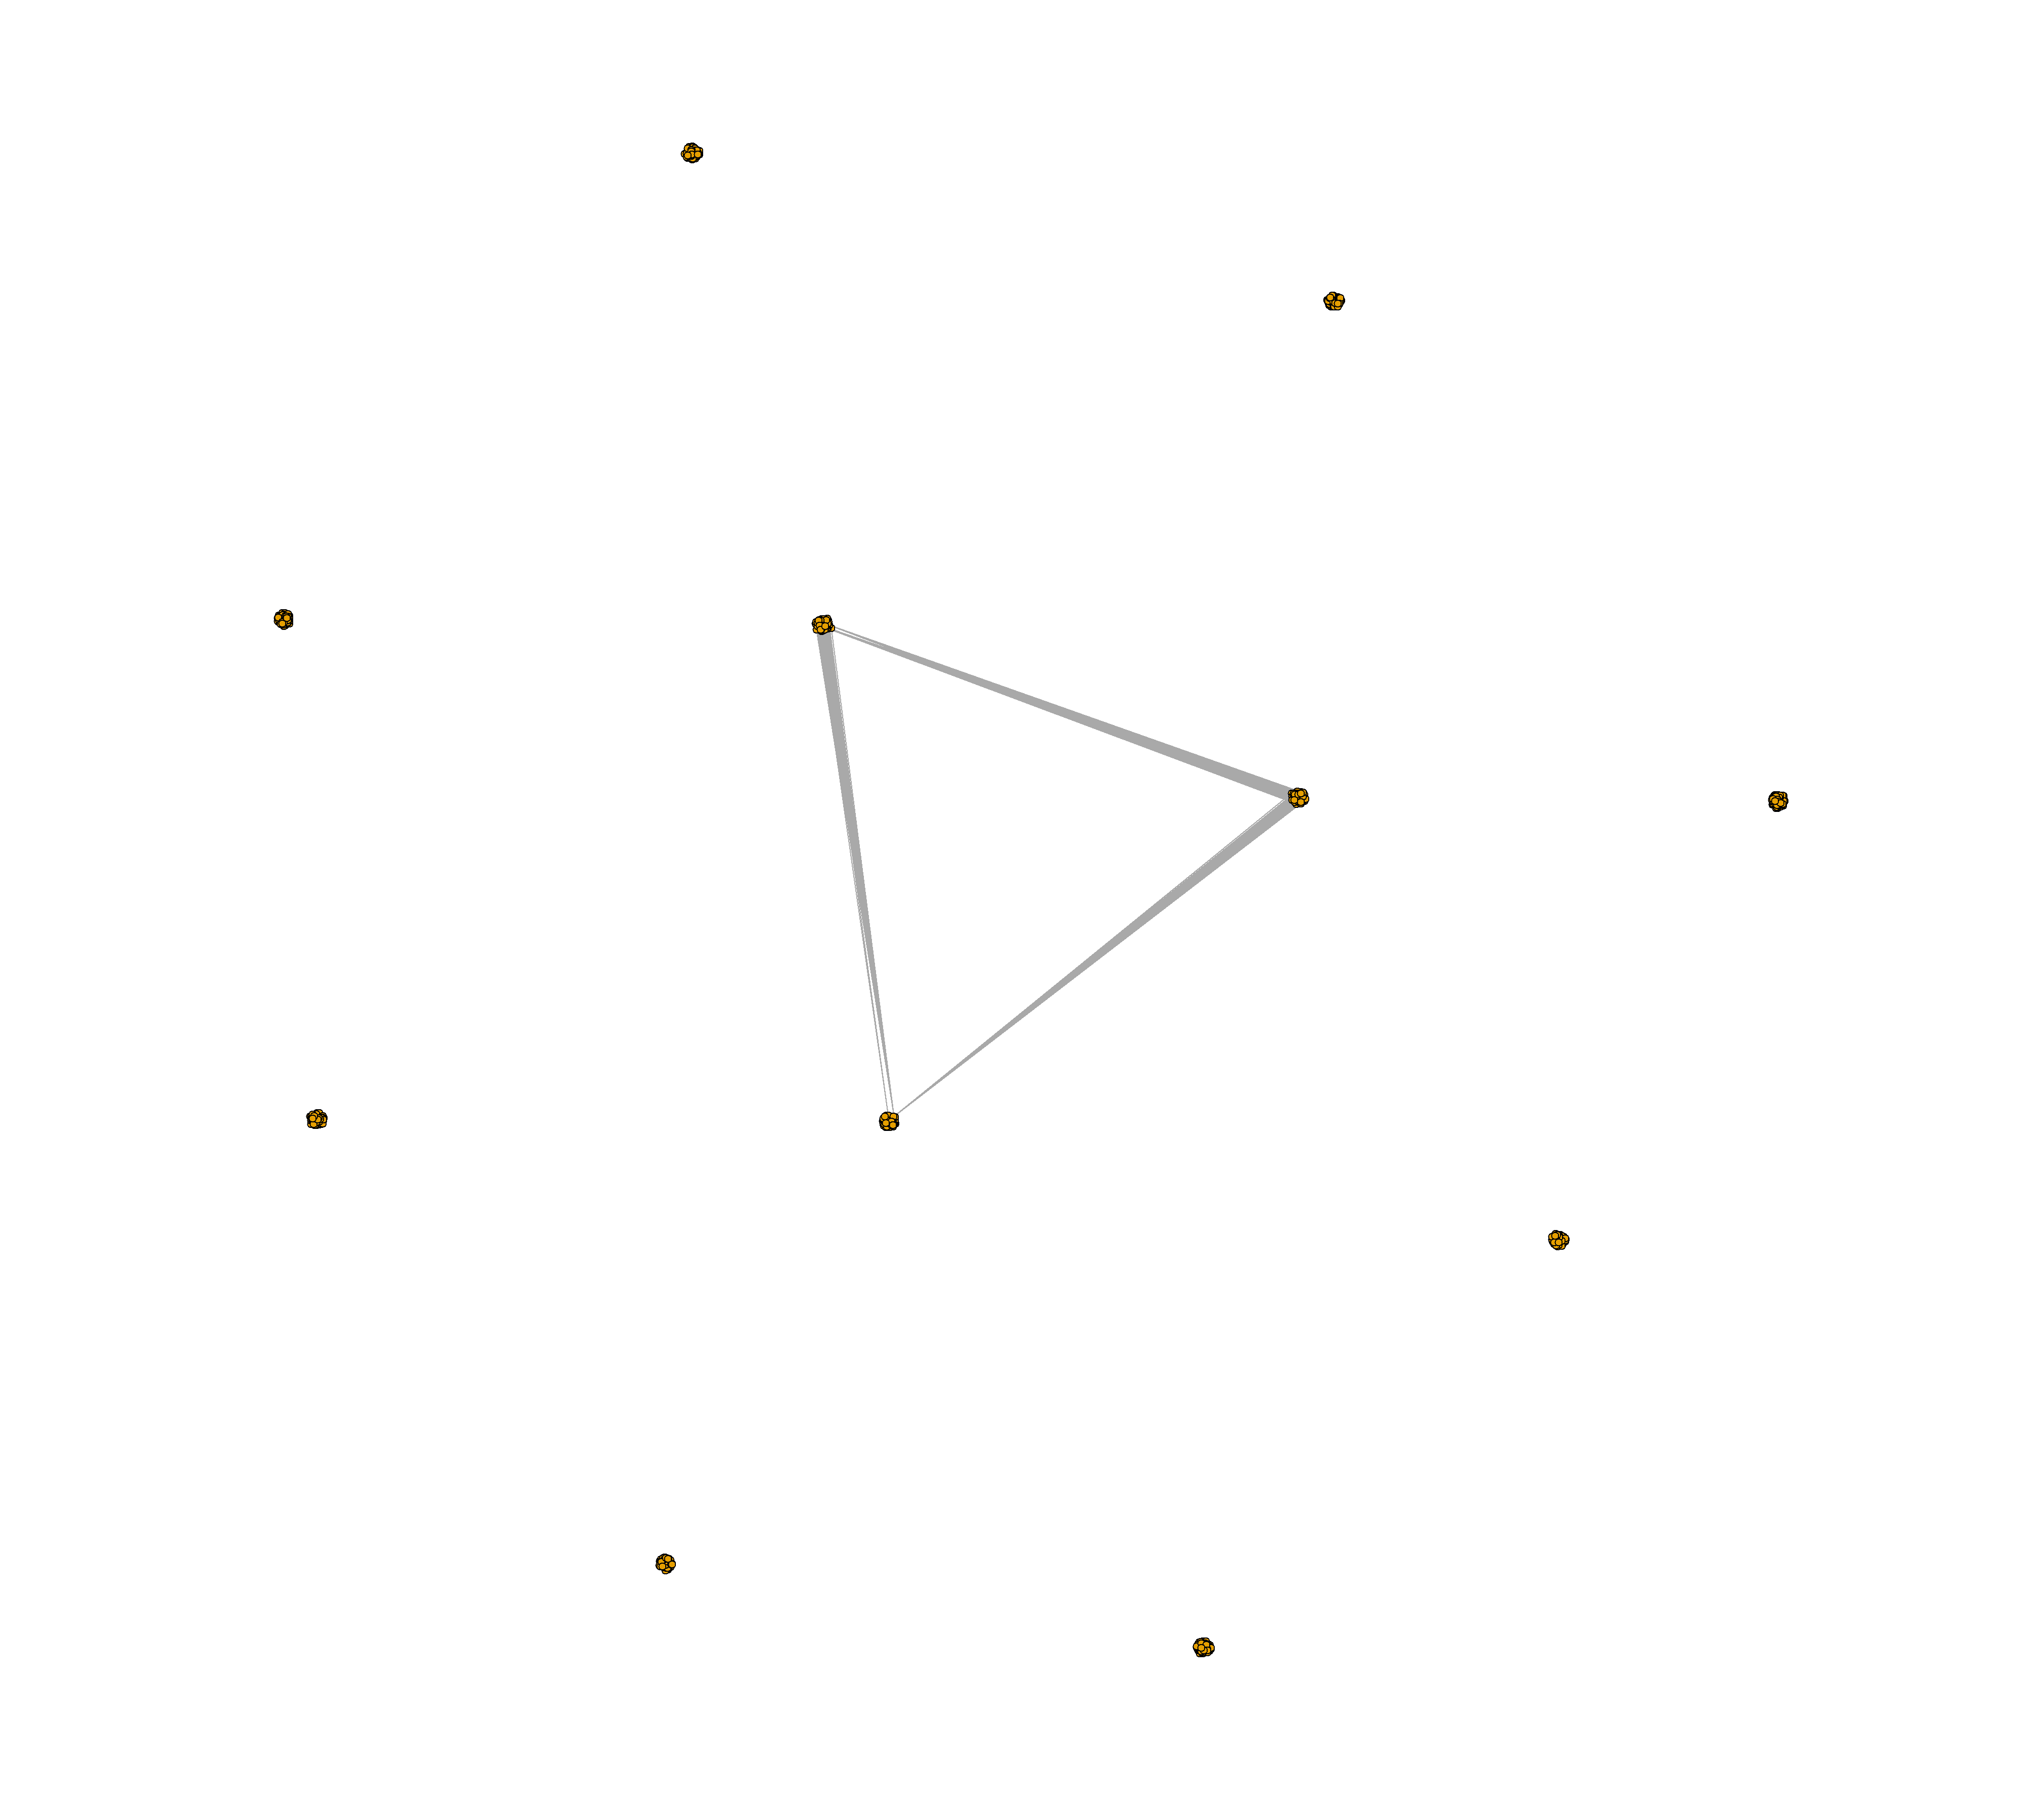

In [175]:
relations_100 <- data.frame(from=combination_matrix_100[1,],
                        to=combination_matrix_100[2,]
                        )
g_100 <- graph_from_data_frame(relations_100, directed=FALSE)
plot(g_100, vertex.size=1, vertex.label=NA)

graph #1

#### Movies with avg rating 7 or higher have common actors?

In [39]:
merged = read.delim('./../dataset/merge_basics_ratings_crew.tsv',header=TRUE)

In [40]:
head(merged)

tconst    titleType isAdult startYear runtimeMinutes genre1      genre2
1 tt0000001 short     0       1894       1             Documentary Short 
2 tt0000002 short     0       1892       5             Animation   Short 
3 tt0000003 short     0       1892       4             Animation   Comedy
4 tt0000004 short     0       1892      12             Animation   Short 
5 tt0000005 short     0       1893       1             Comedy      Short 
6 tt0000006 short     0       1894       1             Short       0     
  genre3  averageRating numVotes n_directors n_writers
1 0       5.6           1654     1           1        
2 0       6.1            199     1           1        
3 Romance 6.5           1366     1           1        
4 0       6.2            121     1           1        
5 0       6.2           2149     1           1        
6 0       5.3            115     1           1

In [41]:
nrow(merged)

[1] 726327

In [42]:
nrow(merged[merged$averageRating=="<NA>", ])/nrow(merged)
nrow(merged[merged$averageRating>6, ])/nrow(merged)

[1] 0.6028125

[1] 0.8468293

In [69]:
#merged[merged$averageRating>6, ]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 437839 rows containing non-finite values (stat_bin)."


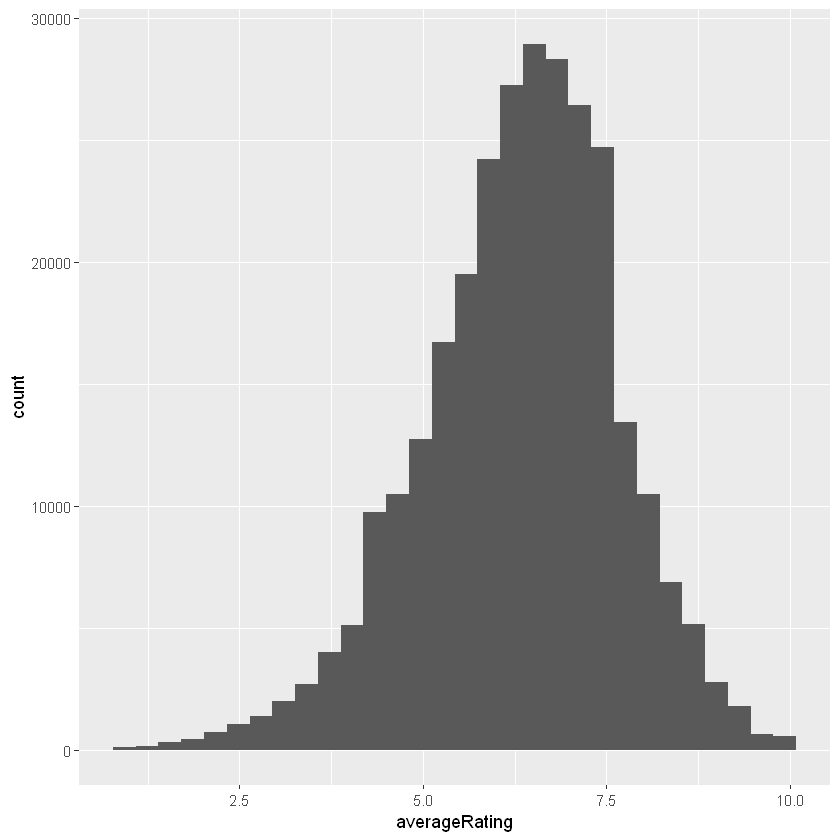

In [44]:
ggplot(merged, aes(x=averageRating)) + geom_histogram()

In [45]:
higher_7 = merged[merged$averageRating >= 7, ]

In [46]:
nrow(higher_7)

[1] 530633

In [47]:
df_higher_7 = cleaned_df[cleaned_df$knownForTitles %in% higher_7$tconst, ]

In [48]:
head(df_higher_7)
nrow(df_higher_7)

nconst    knownForTitles
32596   nm0166380 tt0000014     
46154   nm0244989 tt0000014     
721028  nm0151209 tt0000310     
108635  nm0632577 tt0000376     
709232  nm0086082 tt0000376     
1294070 nm8355534 tt0000376

[1] 176055

In [49]:
df_higher_7$knownForTitles = factor(df_higher_7$knownForTitles) 

In [54]:
split_df_higher_7 = split(df_higher_7, df_higher_7$knownForTitles)

In [55]:
length(split_df_higher_7)

[1] 46780

In [56]:
split_df_higher_7[[1]]

nconst    knownForTitles
32596 nm0166380 tt0000014     
46154 nm0244989 tt0000014

In [59]:
combination_matrix_higher_7 = c()
for( i in 1:length(split_df_higher_7)){
    if(length(split_df_higher_7[[i]][[1]]) > 1){ # does not consider movies that only one person is known for (messes with the structure)
        temp = combn(as.vector(split_df_higher_7[[i]][[1]]), 2)  # combinations without repetions with persons that worked in the same movie
                                                        # so we have the connections for the graph
        combination_matrix_higher_7 = cbind(combination_matrix_higher_7, temp)
        #print(i)
    }
}

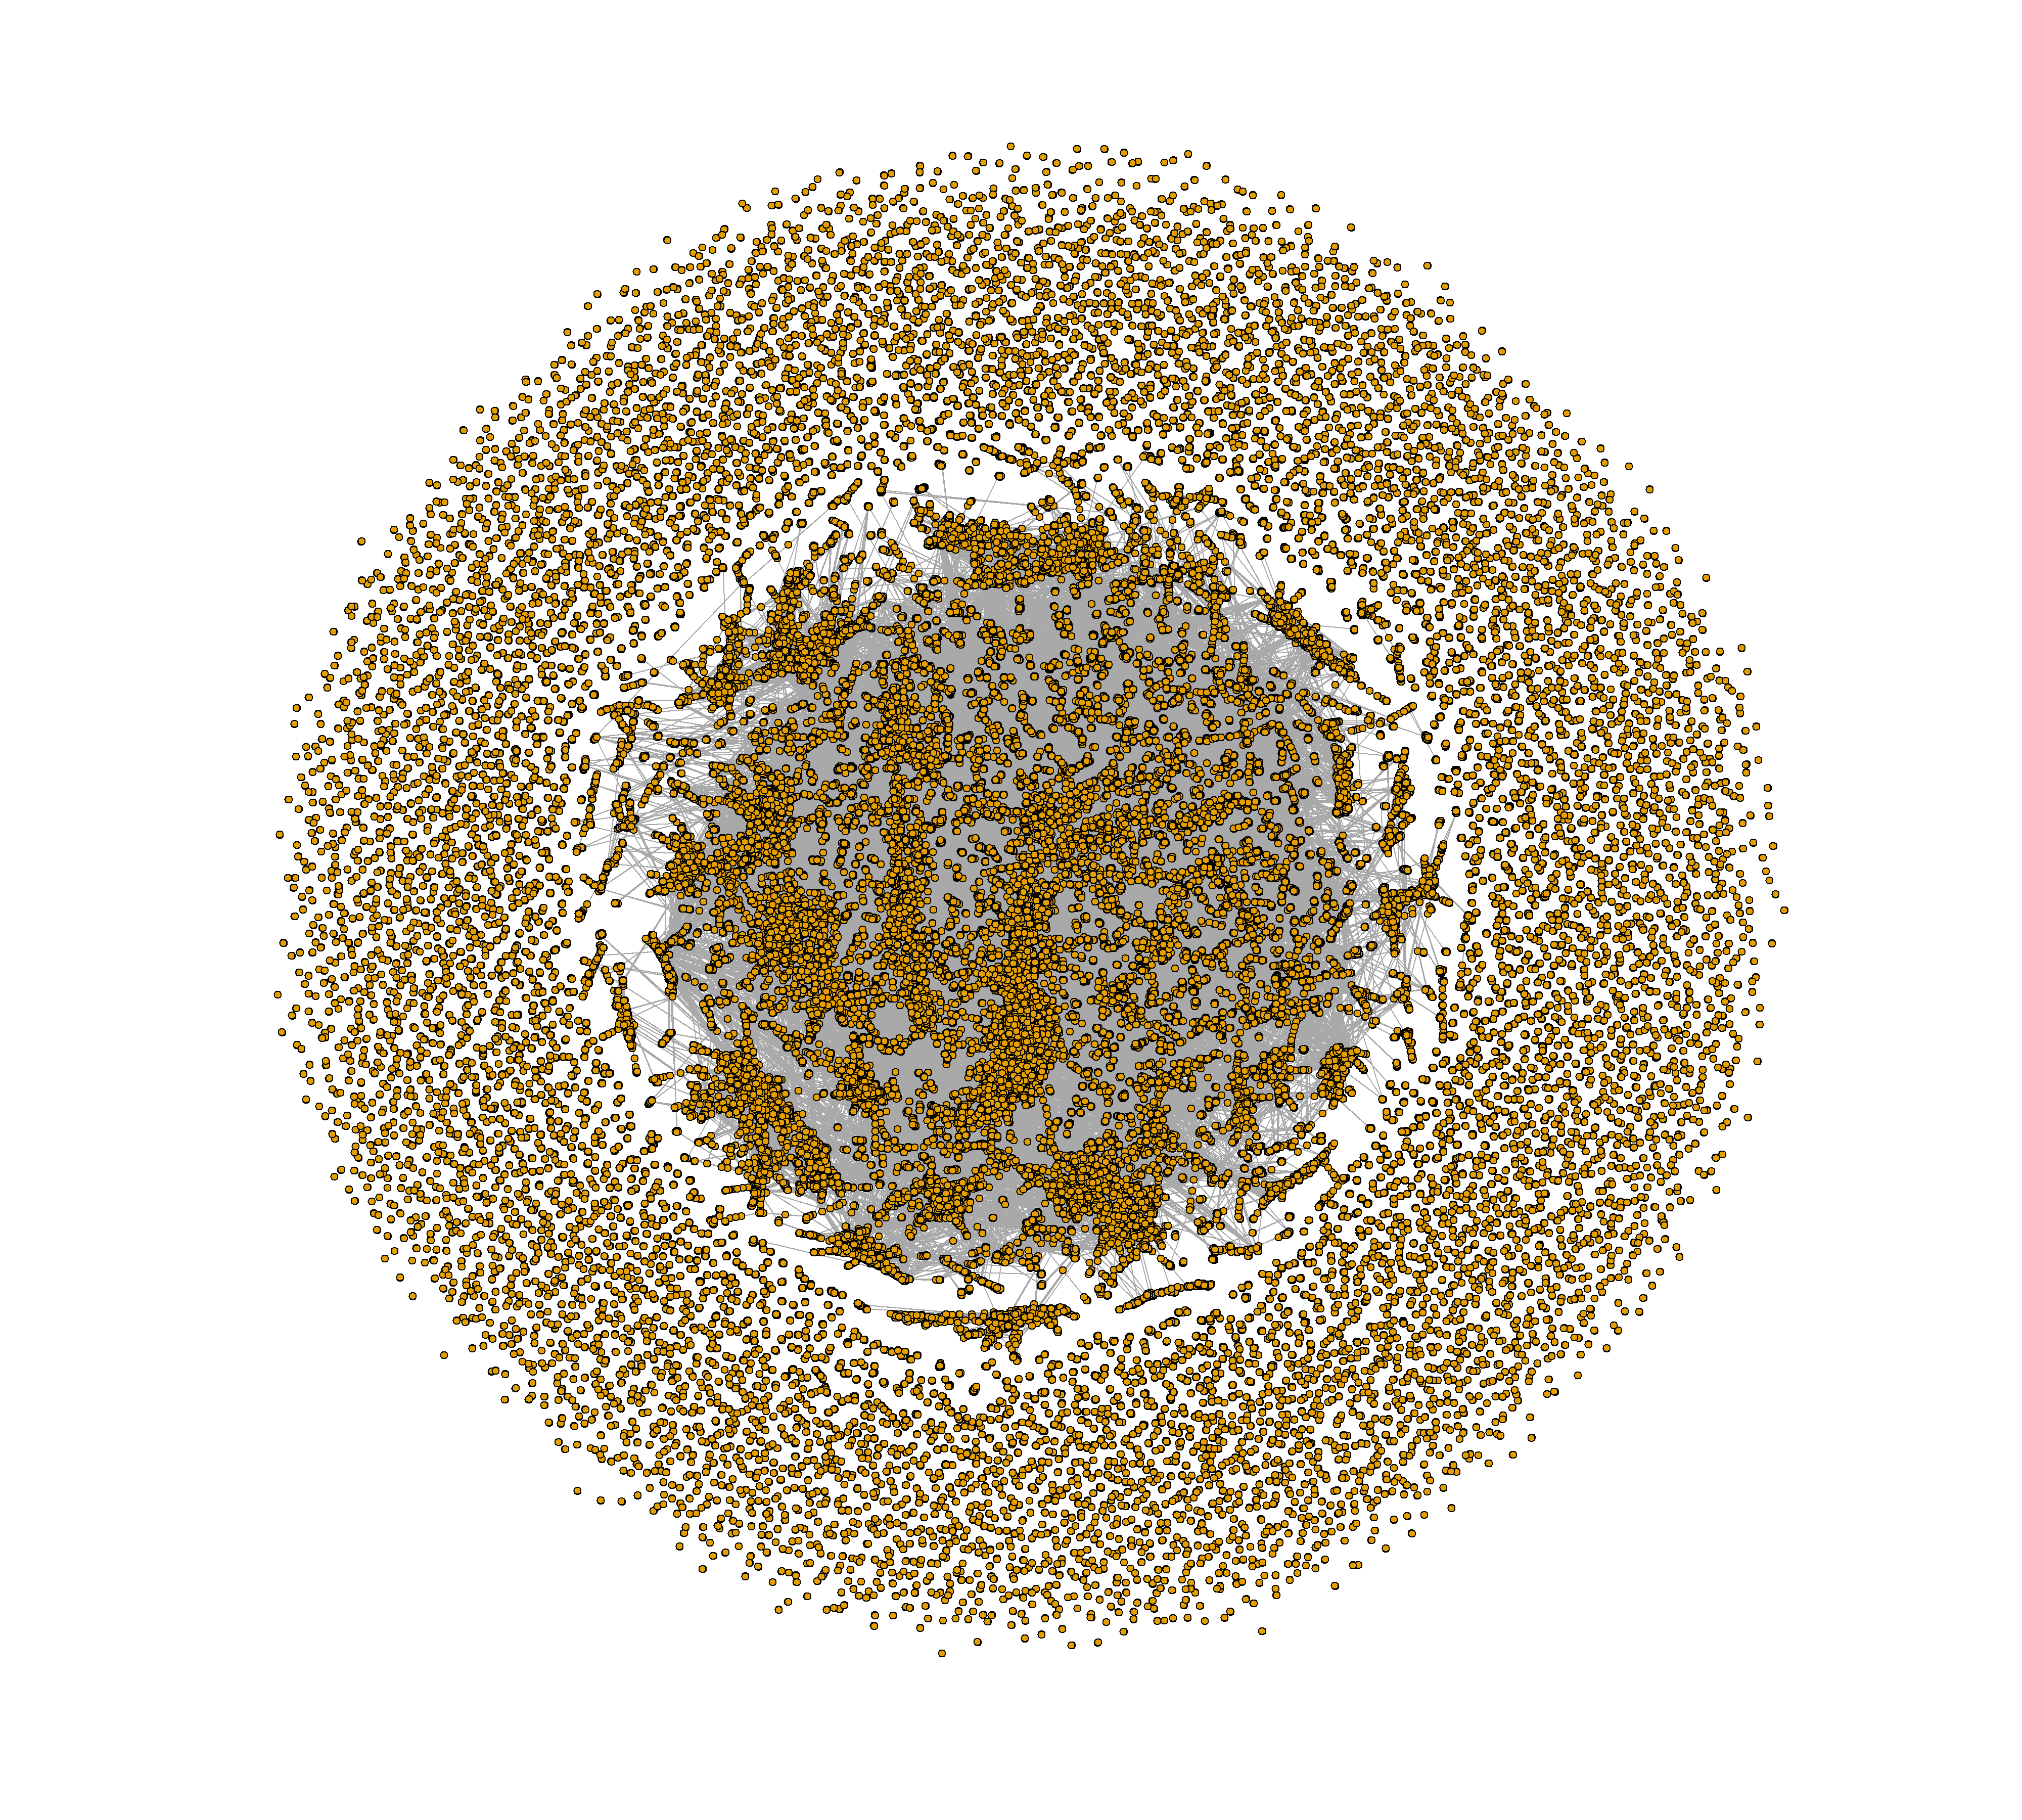

In [174]:
relations_higher_7 <- data.frame(from=combination_matrix_higher_7[1,],
                        to=combination_matrix_higher_7[2,]
                        )
g_higher_7 <- graph_from_data_frame(relations_higher_7, directed=FALSE)
plot(g_higher_7, vertex.size=1, vertex.label=NA)

graph #2

Of the movies that scored 7 or higher, each node is a person, each connection means that those 2 persons worked together

In [62]:
freq_titles_df_higher_7 = count(df_higher_7, "knownForTitles")

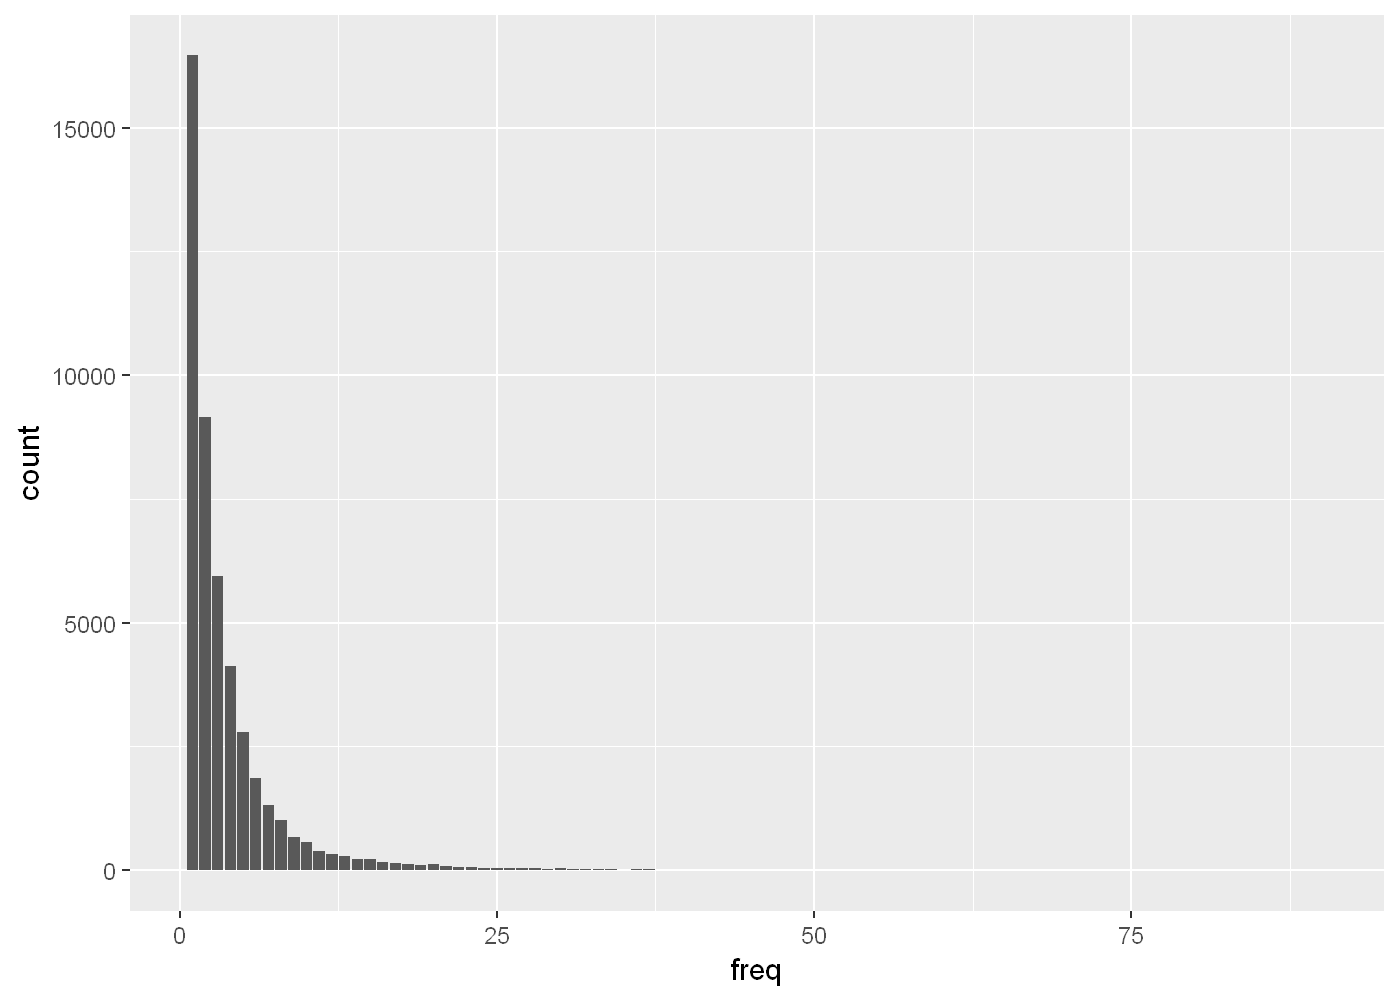

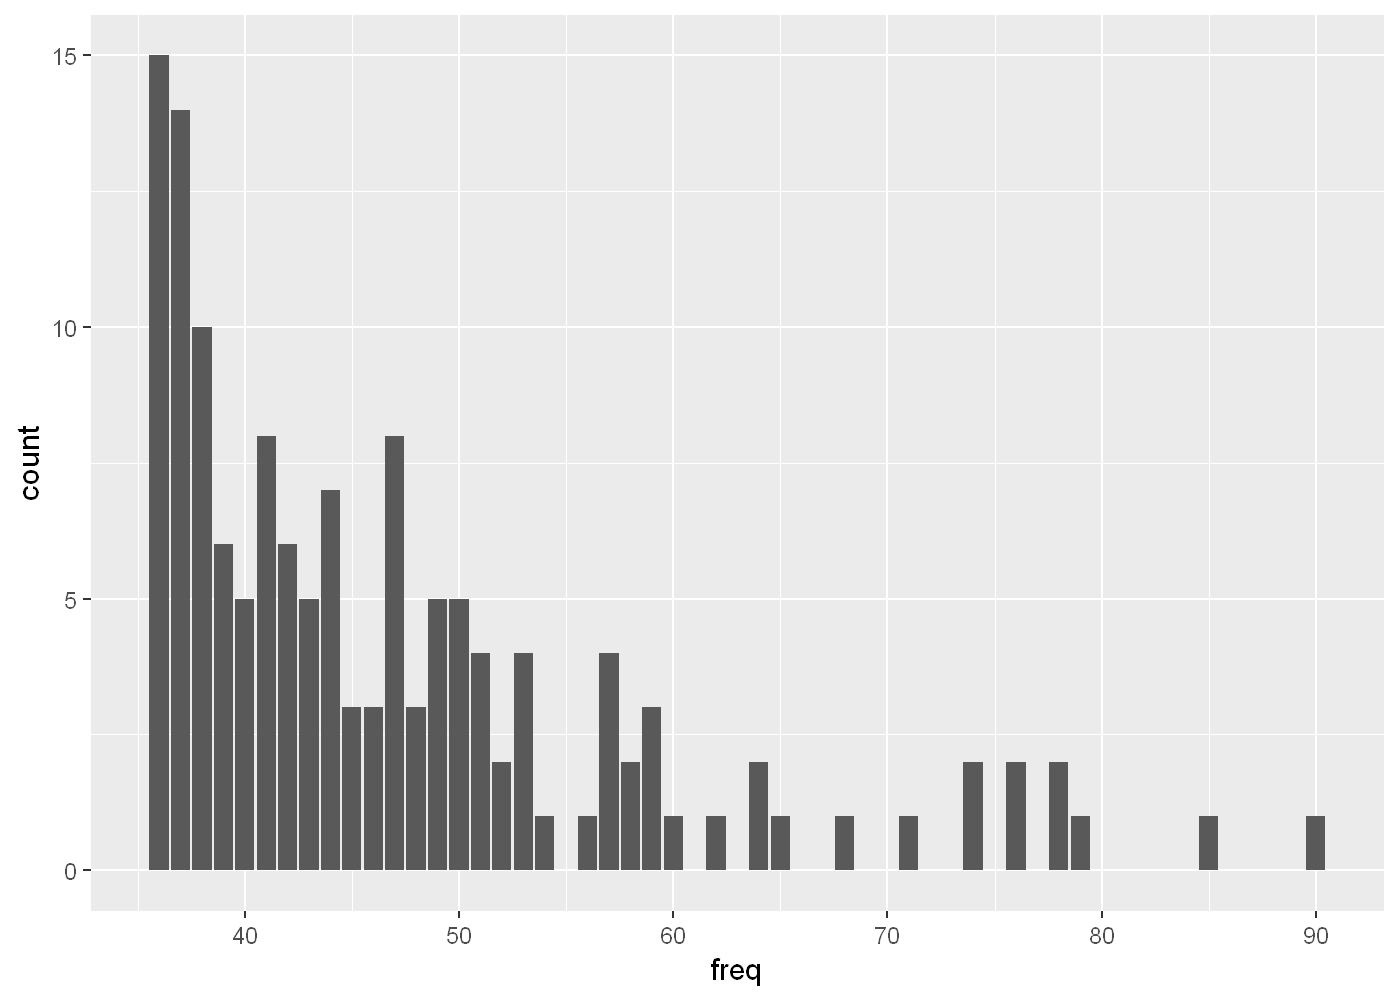

In [63]:
ggplot(freq_titles_df_higher_7, aes(x=freq)) + geom_bar() #+ scale_y_continuous(limits = c(0,300000))
ggplot(freq_titles_df_higher_7[freq_titles_df_higher_7$freq>35,], aes(x=freq)) + geom_bar() #+ scale_y_continuous(limits = c(0,300000))

In [64]:
df_higher_7_small = df_higher_7[df_higher_7$knownForTitles %in% freq_titles_df_higher_7[freq_titles_df_higher_7$freq>35,]$knownForTitles, ]
df_higher_7_small$knownForTitles = factor(df_higher_7_small$knownForTitles)

In [65]:
head(df_higher_7_small)
nrow(df_higher_7_small)

nconst    knownForTitles
16    nm0000022 tt0031381     
1085  nm0001366 tt0031381     
6723  nm0026655 tt0031381     
22870 nm0112203 tt0031381     
68243 nm0382730 tt0031381     
79293 nm0450810 tt0031381

[1] 6578

In [66]:
df_higher_7_small$knownForTitles = factor(df_higher_7_small$knownForTitles) 
split_df_higher_7_small = split(df_higher_7_small, df_higher_7_small$knownForTitles)
length(split_df_higher_7_small)

[1] 140

In [67]:
combination_matrix_higher_7_small = c()
for( i in 1:length(split_df_higher_7_small)){
    if(length(split_df_higher_7_small[[i]][[1]]) > 1){ # does not consider movies that only one person is known for (messes with the structure)
        temp = combn(as.vector(split_df_higher_7_small[[i]][[1]]), 2)  # combinations without repetions with persons that worked in the same movie
                                                        # so we have the connections for the graph
        combination_matrix_higher_7_small = cbind(combination_matrix_higher_7_small, temp)
        #print(i)
    }
}

In [172]:
relations_higher_7_small <- data.frame(from=combination_matrix_higher_7_small[1,],
                        to=combination_matrix_higher_7_small[2,]
                        )
g_higher_7_small <- graph_from_data_frame(relations_higher_7_small, directed=FALSE)

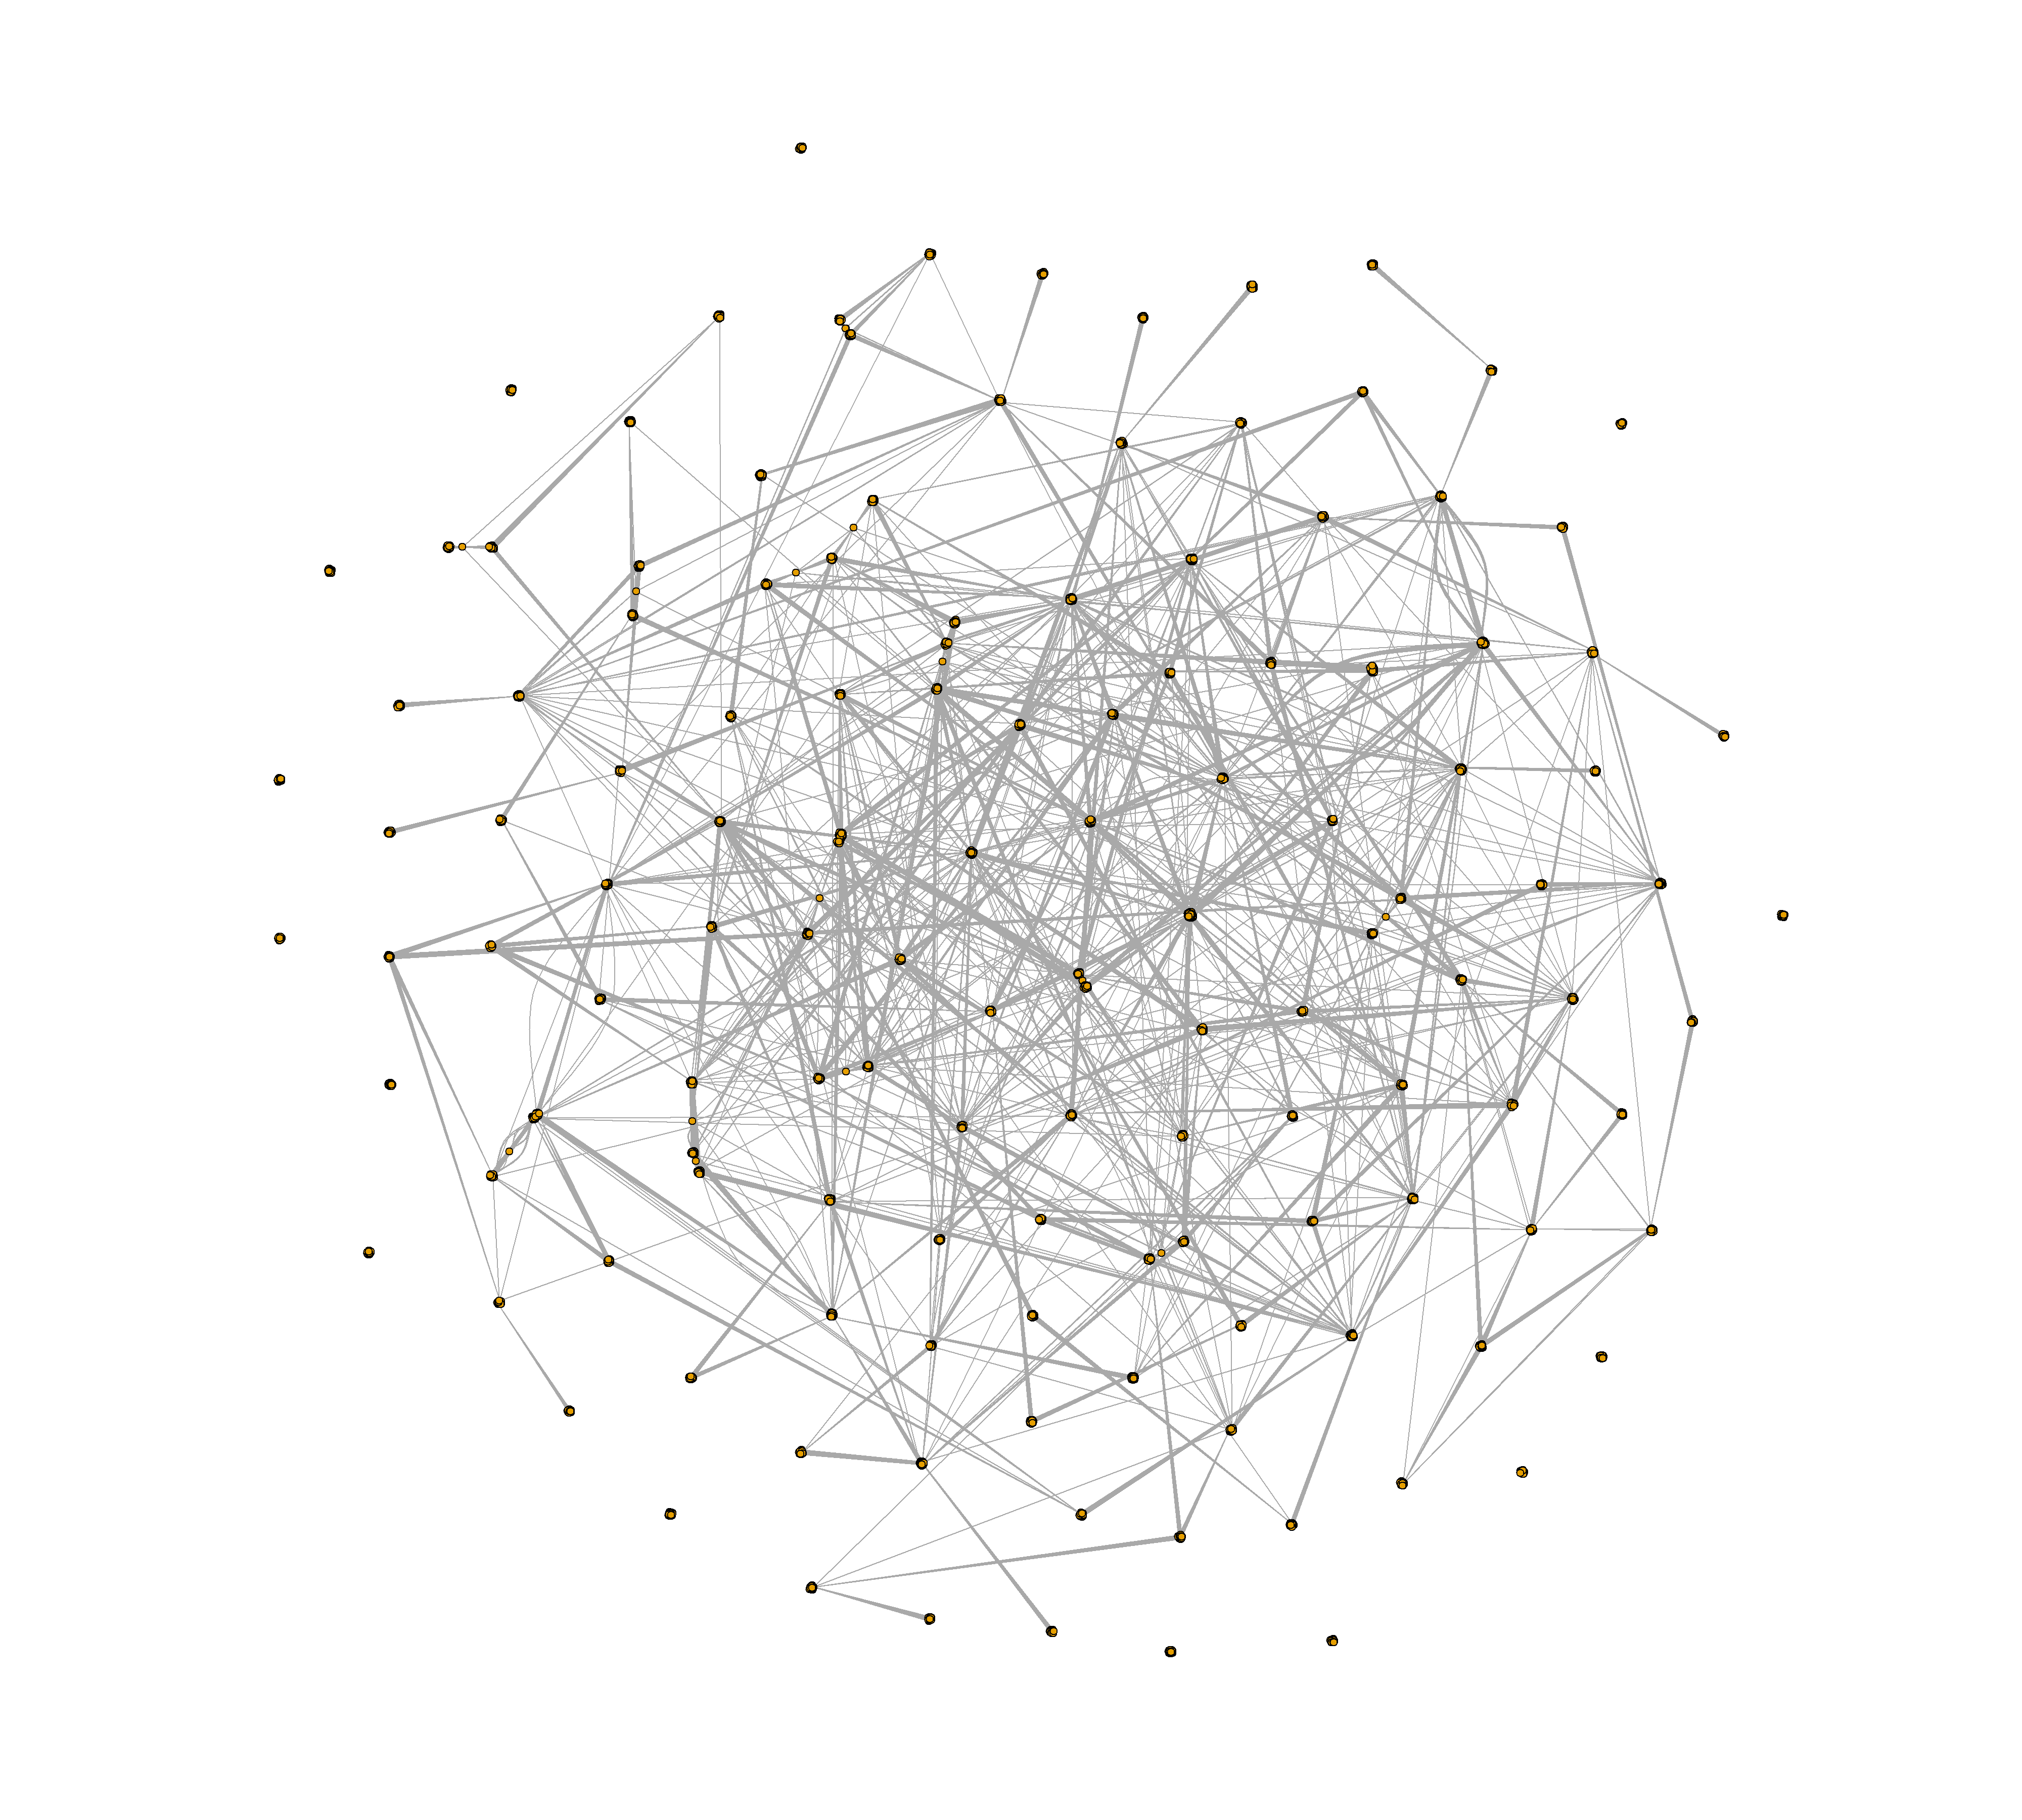

In [173]:
plot(g_higher_7_small, vertex.size=1, vertex.label=NA)

graph #3

#### For movies that ranked 7 or higher, each node is a movie and each connection is the number of people they have in common

In [70]:
split_by_person_df_higher_7 = split(df_higher_7, df_higher_7$nconst)
length(split_by_person_df_higher_7)

[1] 691130

In [71]:
split_by_person_df_higher_7[[1]]

nconst    knownForTitles
2073391 nm0000002 tt0037382     
1382261 nm0000002 tt0038355     
691131  nm0000002 tt0071877

In [132]:
#split_by_person_df_higher_7[1:10]

In [108]:
combination_matrix_person_higher_7 = c()
for( i in 1:length(split_by_person_df_higher_7)){
#for( i in 1:1000){
    if(length(split_by_person_df_higher_7[[i]][[2]]) > 1){ # does not consider movies that only one person is known for (messes with the structure)
        temp = combn(as.vector(split_by_person_df_higher_7[[i]][[2]]), 2)  # combinations without repetions with persons that worked in the same movie
                                                        # so we have the connections for the graph
        combination_matrix_person_higher_7 = cbind(combination_matrix_person_higher_7, temp)
        #print(i)
    }
}

In [128]:
#combination_matrix_person_higher_7

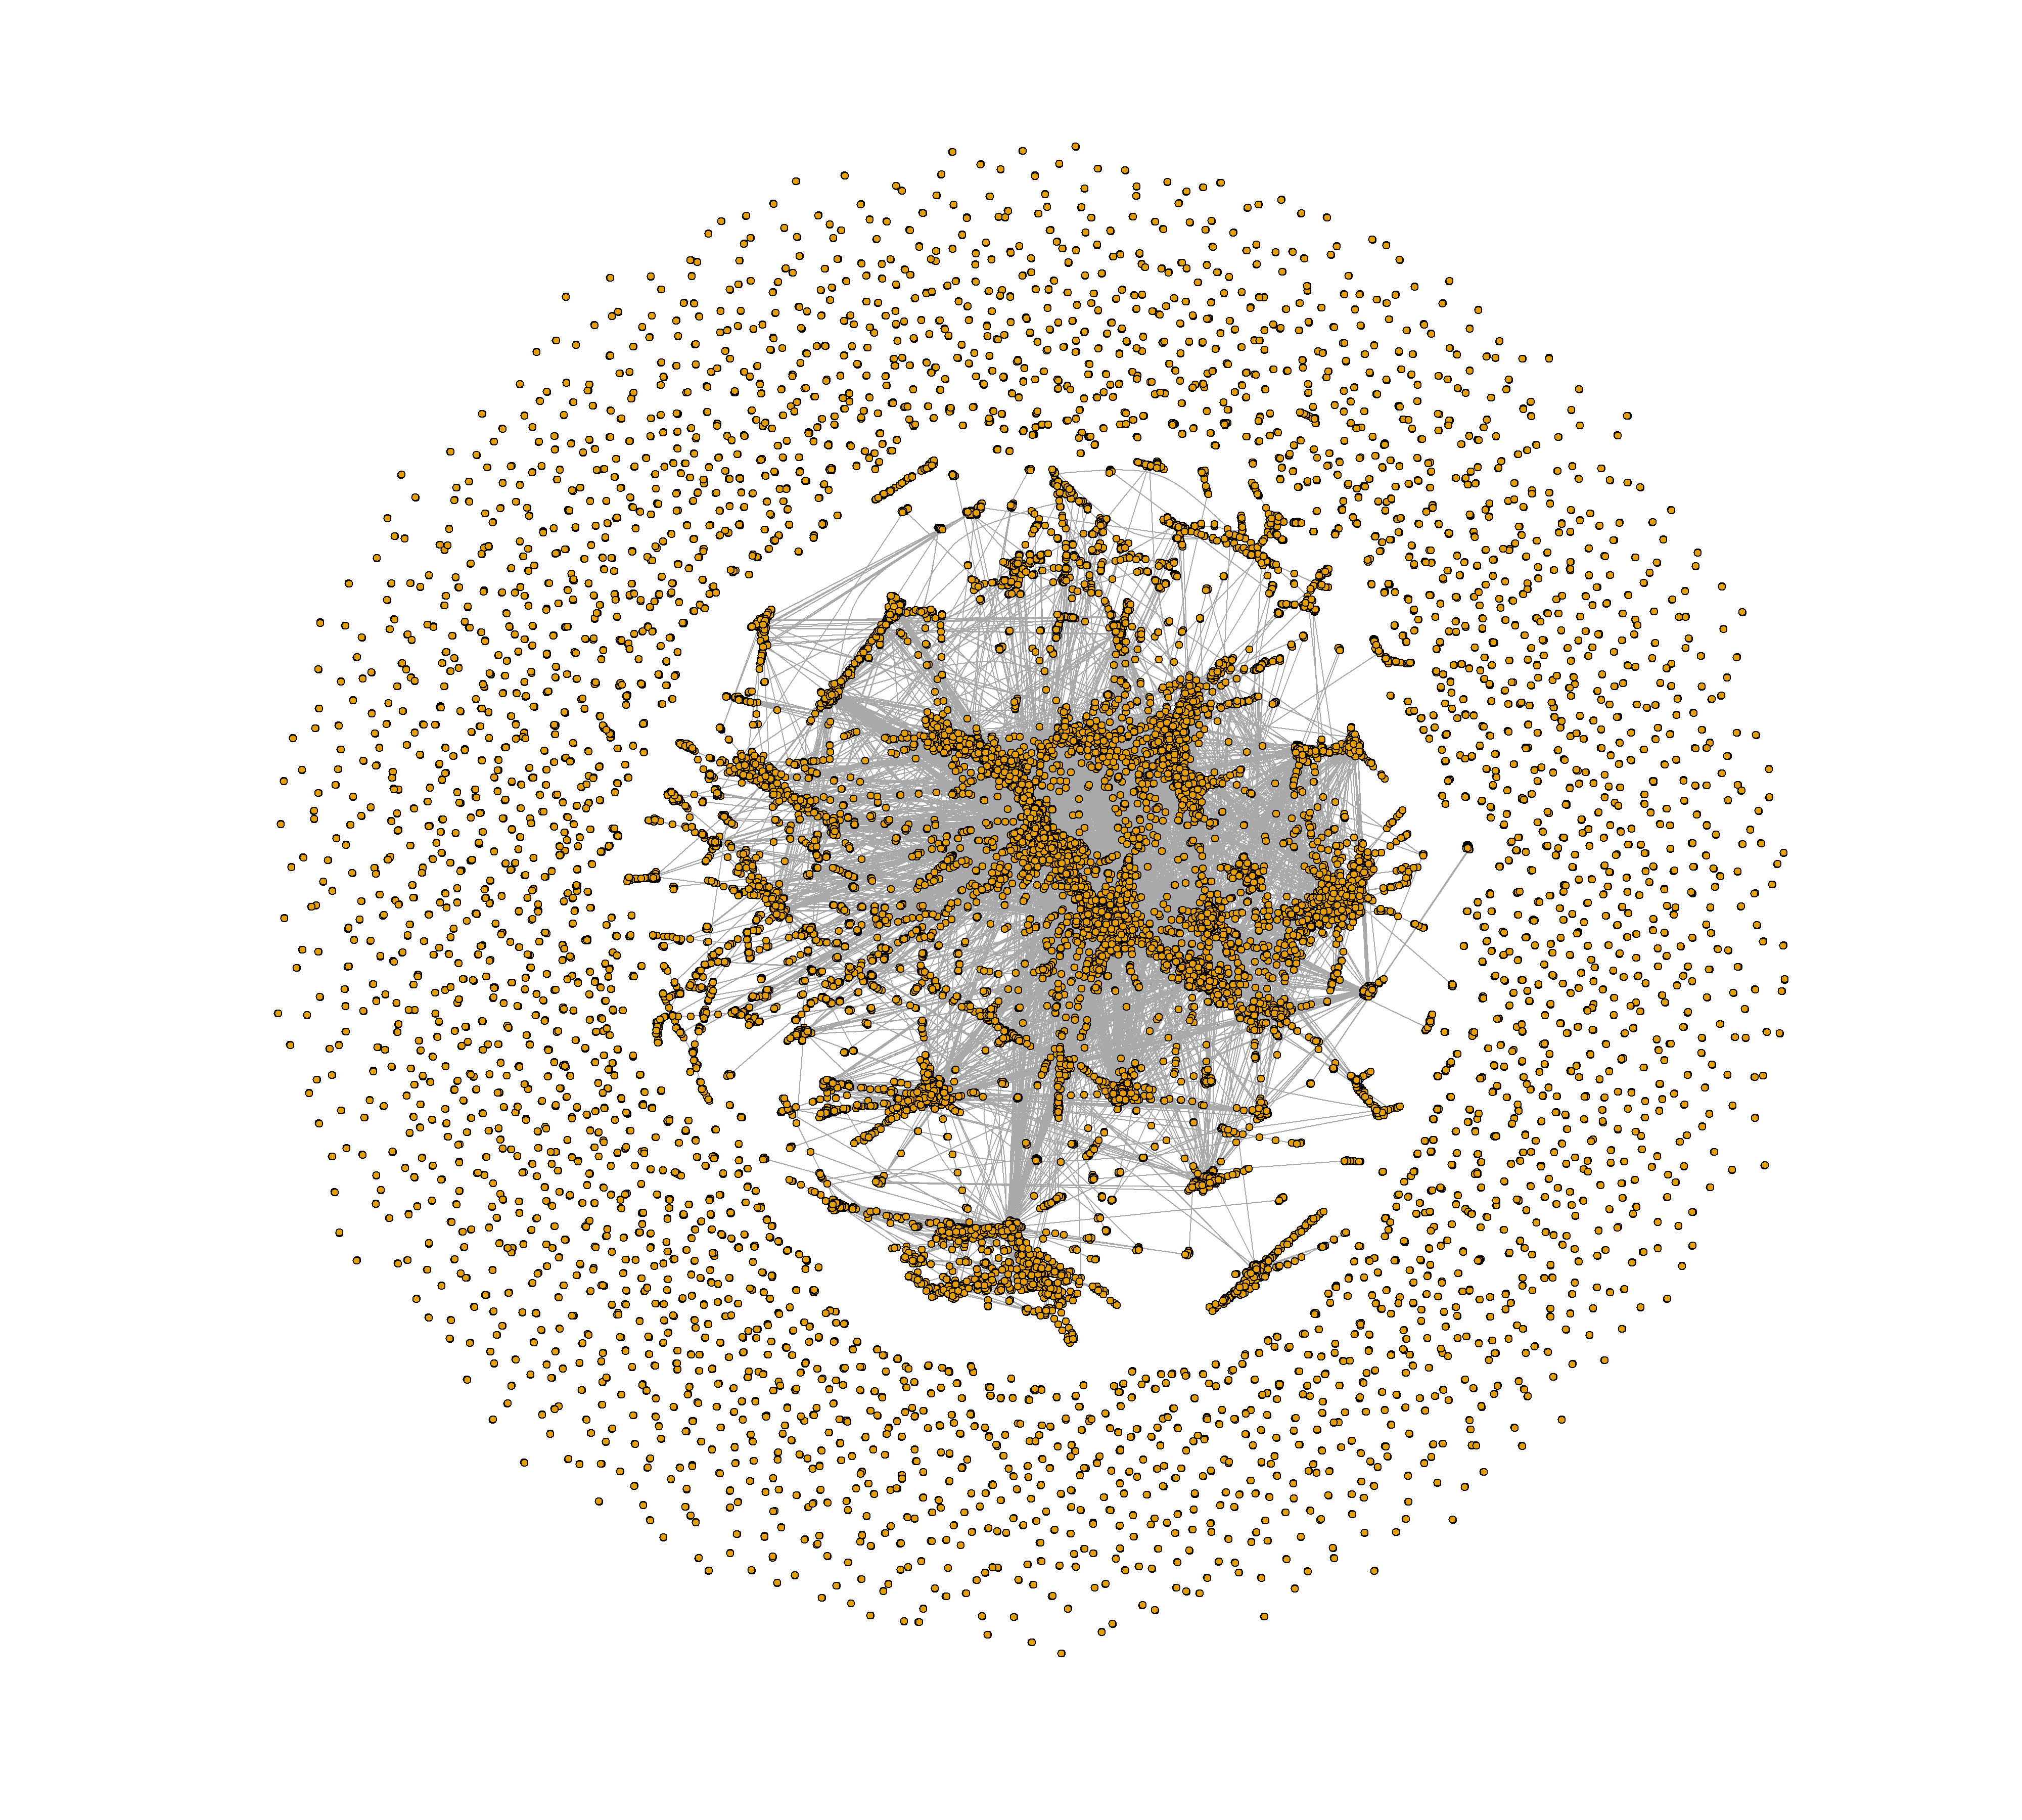

In [111]:
relations_person_higher_7 <- data.frame(from=combination_matrix_person_higher_7[1,],
                        to=combination_matrix_person_higher_7[2,]
                        )
g_person_higher_7 <- graph_from_data_frame(relations_person_higher_7, directed=FALSE)
plot(g_person_higher_7, vertex.size=1, vertex.label=NA)

graph #4

In [140]:
#unique(combination_matrix_person_higher_7[1,]) %in% unique(combination_matrix_person_higher_7[2,])
df_higher_7_ordered = df_higher_7[order(df_higher_7$nconst),]
head(df_higher_7_ordered)
nrow(df_higher_7_ordered)

nconst    knownForTitles
2073391 nm0000002 tt0037382     
1382261 nm0000002 tt0038355     
691131  nm0000002 tt0071877     
691132  nm0000003 tt0054452     
1382262 nm0000003 tt0057345     
691133  nm0000004 tt0077975

[1] 176055

In [139]:
higher_7_filtered = higher_7[(higher_7$tconst %in% knownForTitles_ordered_higher_7), c(1,9)]
head(higher_7_filtered)
nrow(higher_7_filtered)

tconst    averageRating
14  tt0000014 7.1          
308 tt0000310 7.3          
373 tt0000376 7.0          
414 tt0000417 8.2          
436 tt0000439 7.3          
462 tt0000465 7.3

[1] 46780

In [144]:
merged_df_higher_7 = merge(df_higher_7_ordered, higher_7_filtered, by.x="knownForTitles", by.y="tconst")

In [149]:
merged_df_higher_7 = merged_df_higher_7[order(merged_df_higher_7$nconst),]

In [150]:
head(merged_df_higher_7)
nrow(merged_df_higher_7)

knownForTitles nconst    averageRating
7664  tt0037382      nm0000002 7.8          
8132  tt0038355      nm0000002 7.9          
28545 tt0071877      nm0000002 7.3          
16636 tt0054452      nm0000003 7.6          
18837 tt0057345      nm0000003 7.6          
32009 tt0077975      nm0000004 7.5

[1] 176055

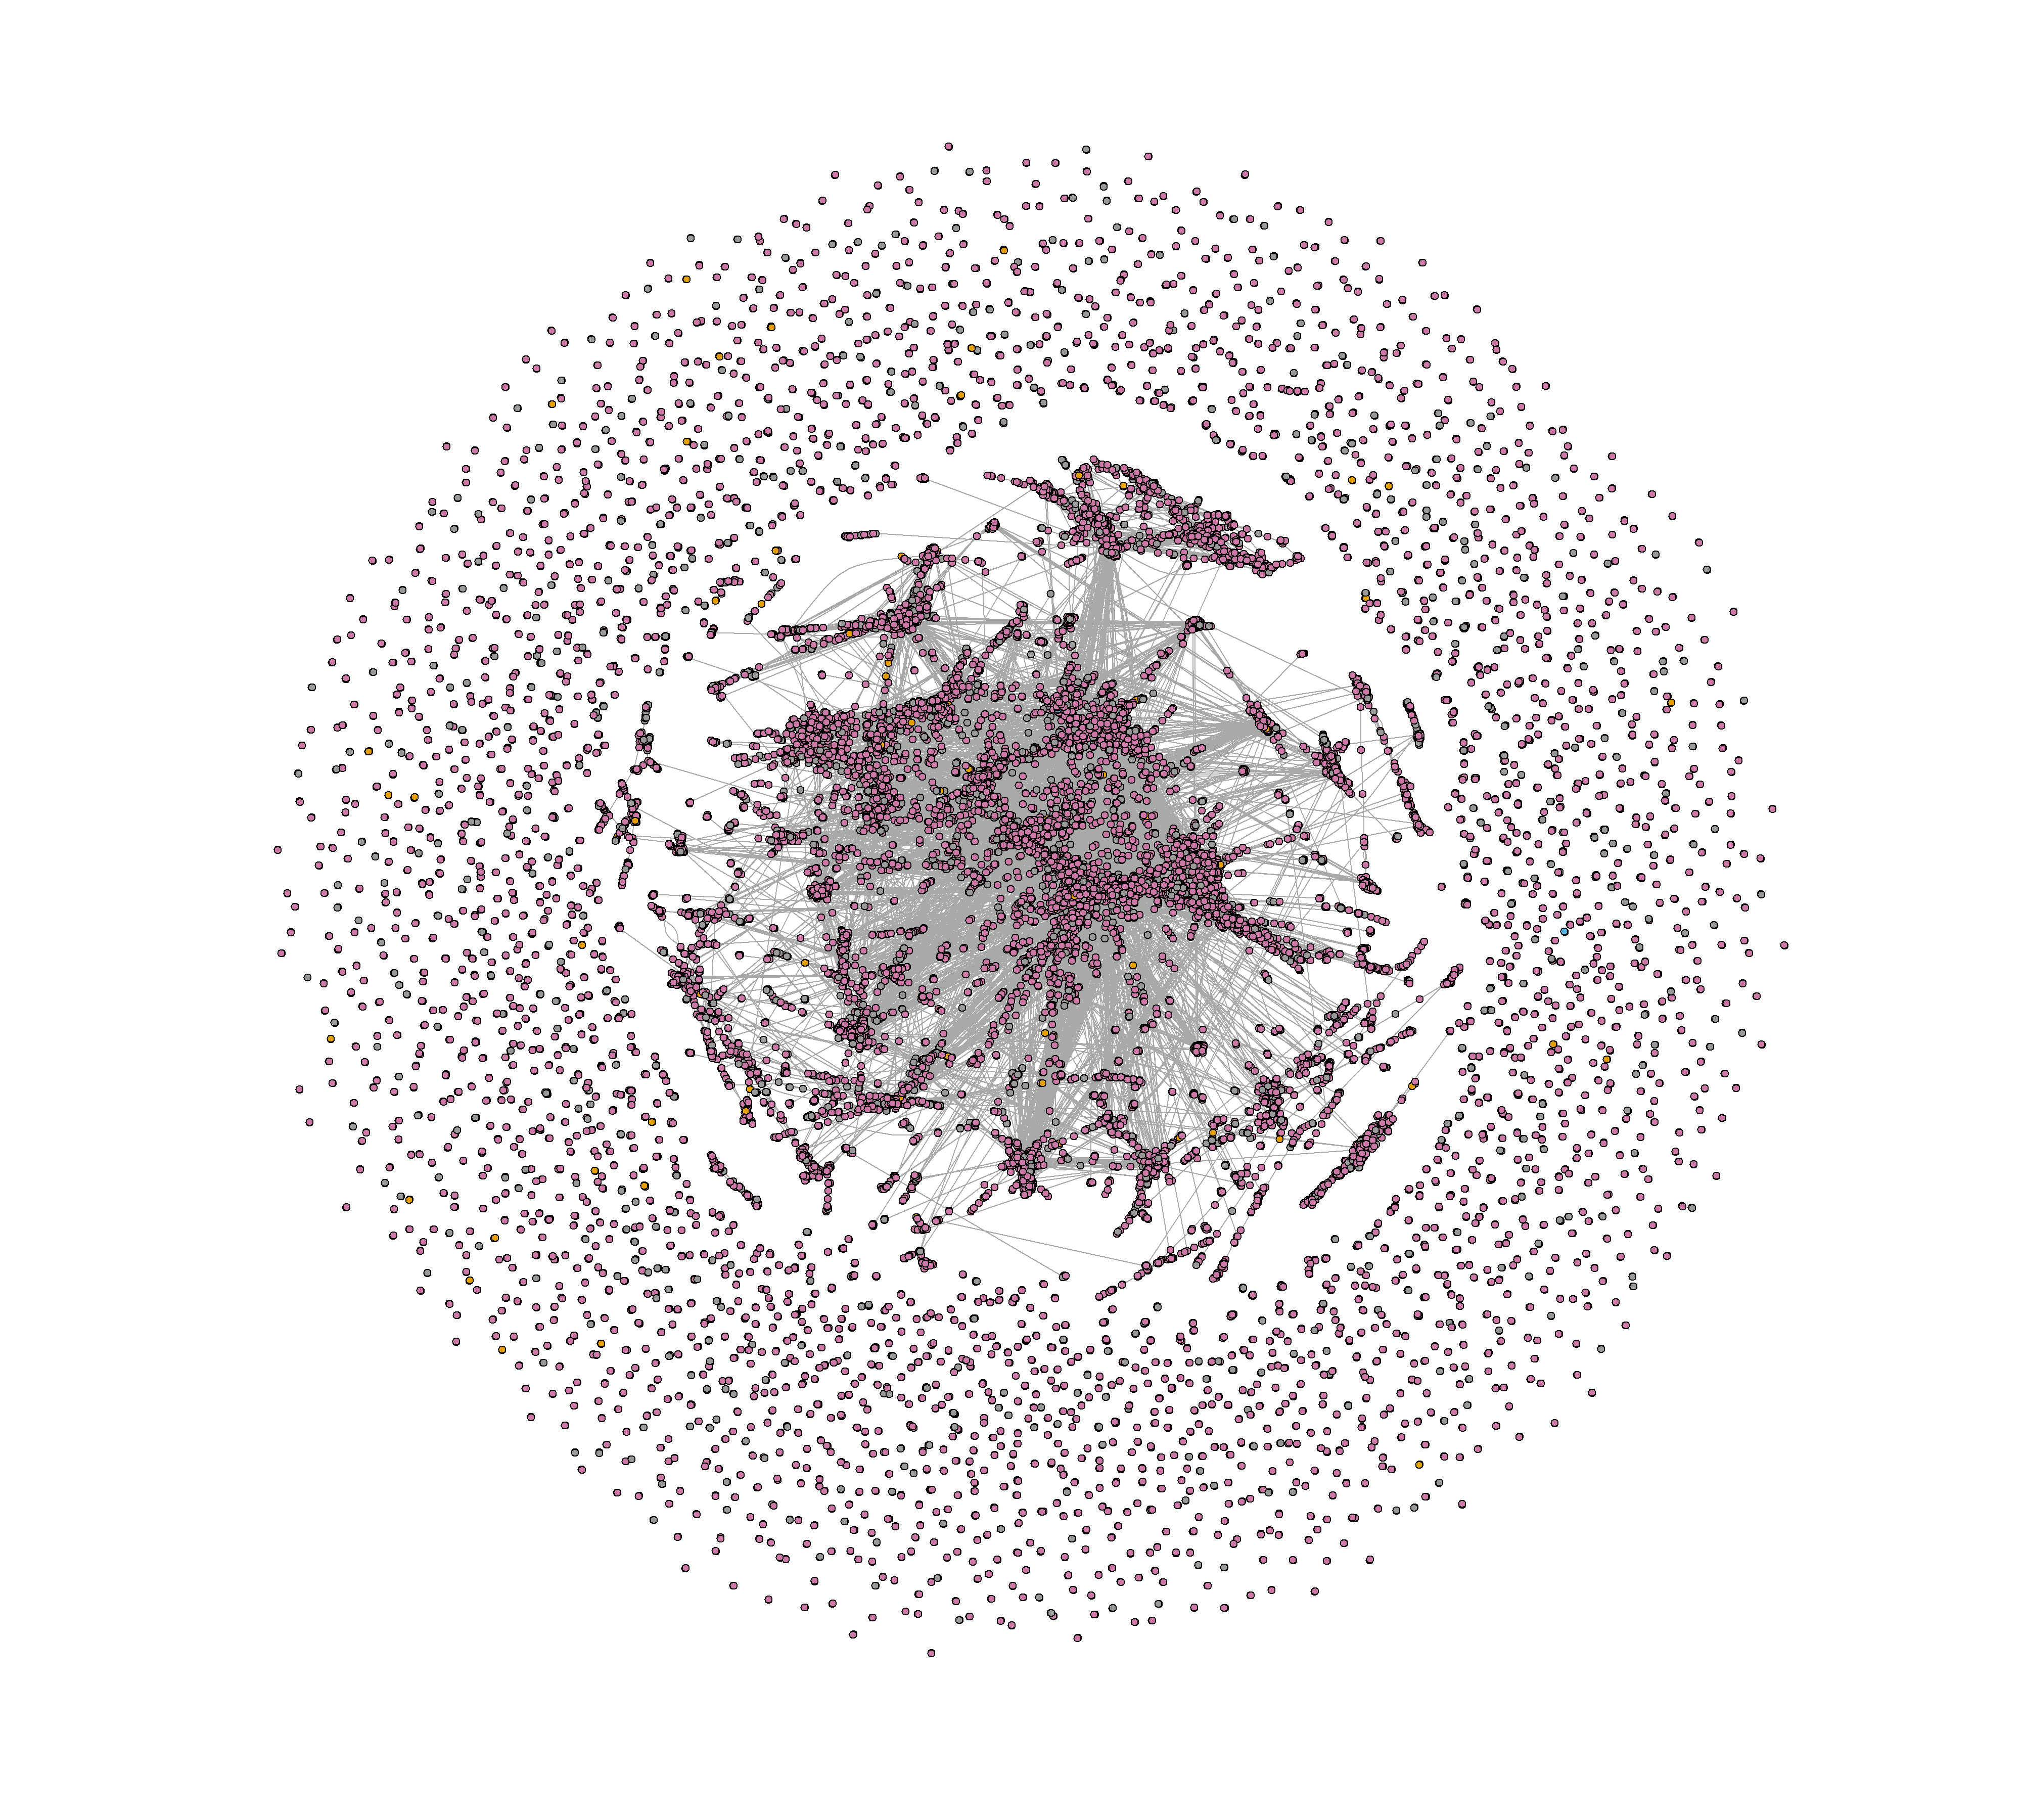

In [152]:
plot(g_person_higher_7, vertex.size=1, vertex.label=NA, vertex.color=merged_df_higher_7$averageRating)

graph #5

In [ ]:
split_lengths = c()
for( i in 1:length(split_by_person_df_higher_7)){
    if(length(split_by_person_df_higher_7[[i]][[2]]) > 1){
        split_lengths = cbind(split_lengths, length(split_by_person_df_higher_7[[i]][[2]]))
    }
}

In [ ]:
split_lengths_df = data.frame(len=split_lengths[1,])

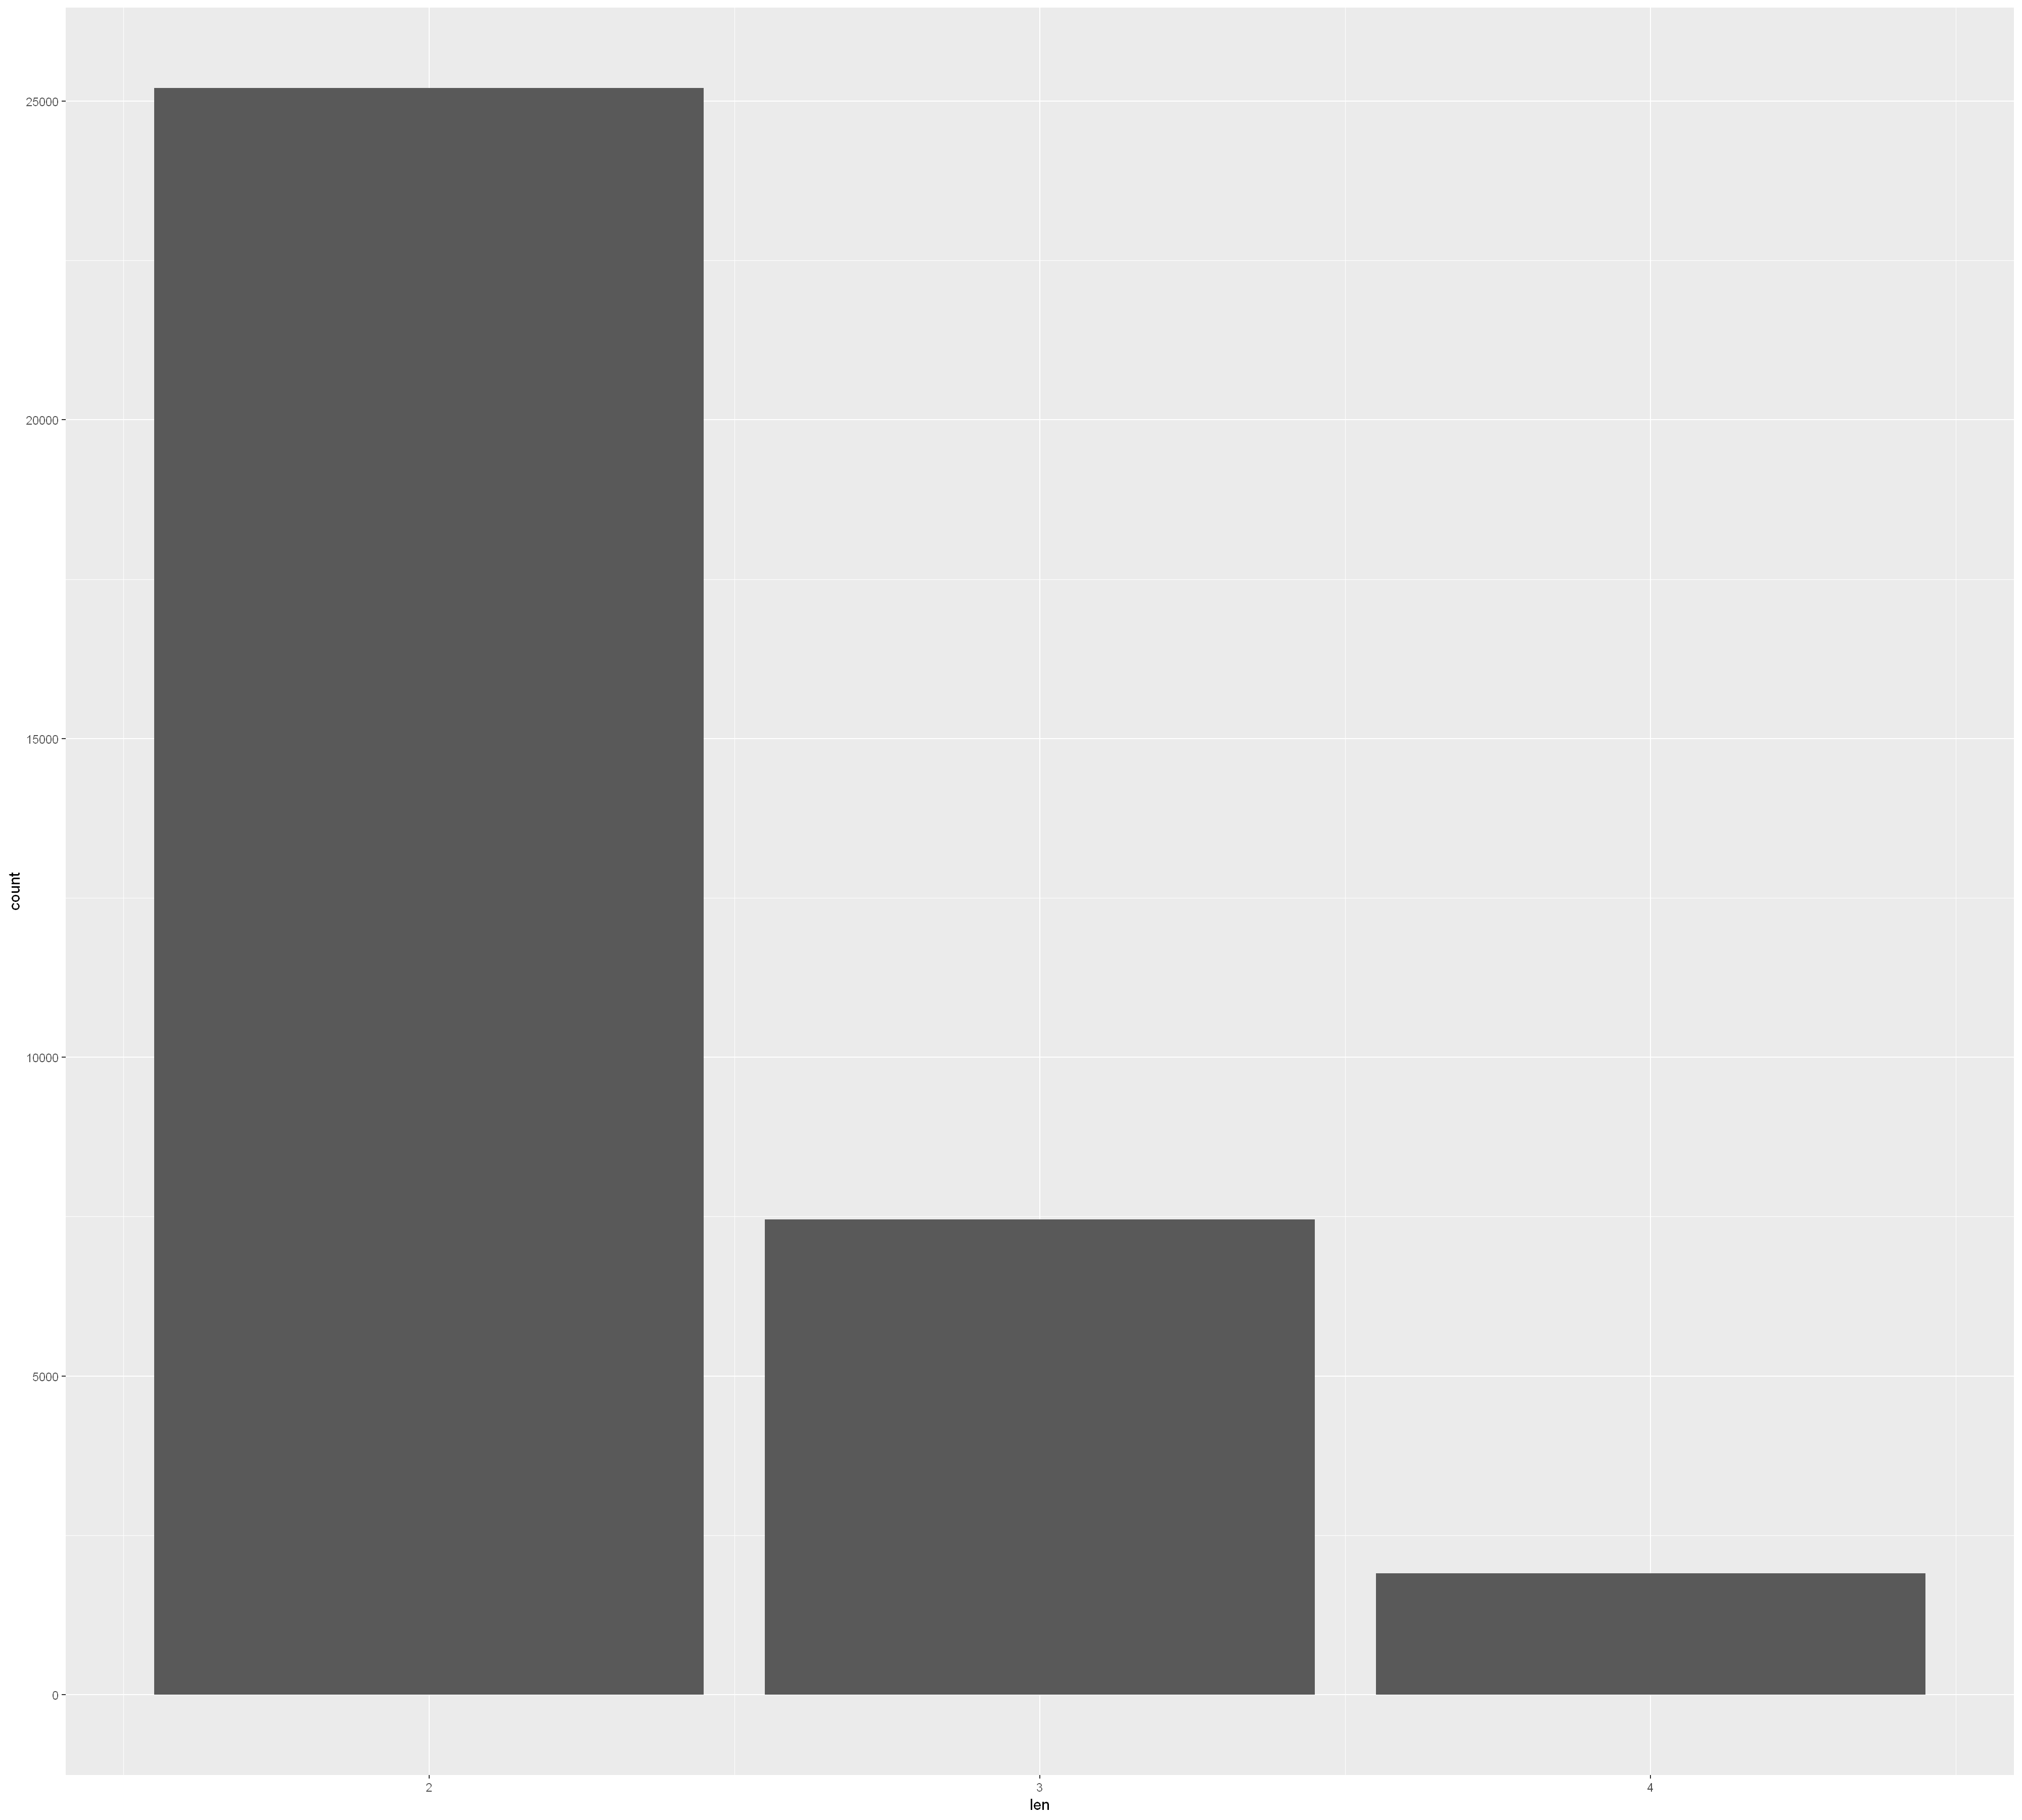

In [166]:
ggplot(split_lengths_df, aes(x=len)) + geom_bar()

In [212]:
combination_matrix_person_len_4 = c()
for( i in 1:length(split_by_person_df_higher_7)){
#for( i in 1:1000){
    if(length(split_by_person_df_higher_7[[i]][[2]]) == 4){ # does not consider movies that only one person is known for (messes with the structure)
        temp = combn(as.vector(split_by_person_df_higher_7[[i]][[2]]), 2)  # combinations without repetions with persons that worked in the same movie
                                                        # so we have the connections for the graph
        combination_matrix_person_len_4 = cbind(combination_matrix_person_len_4, temp)
        #print(i)
    }
}

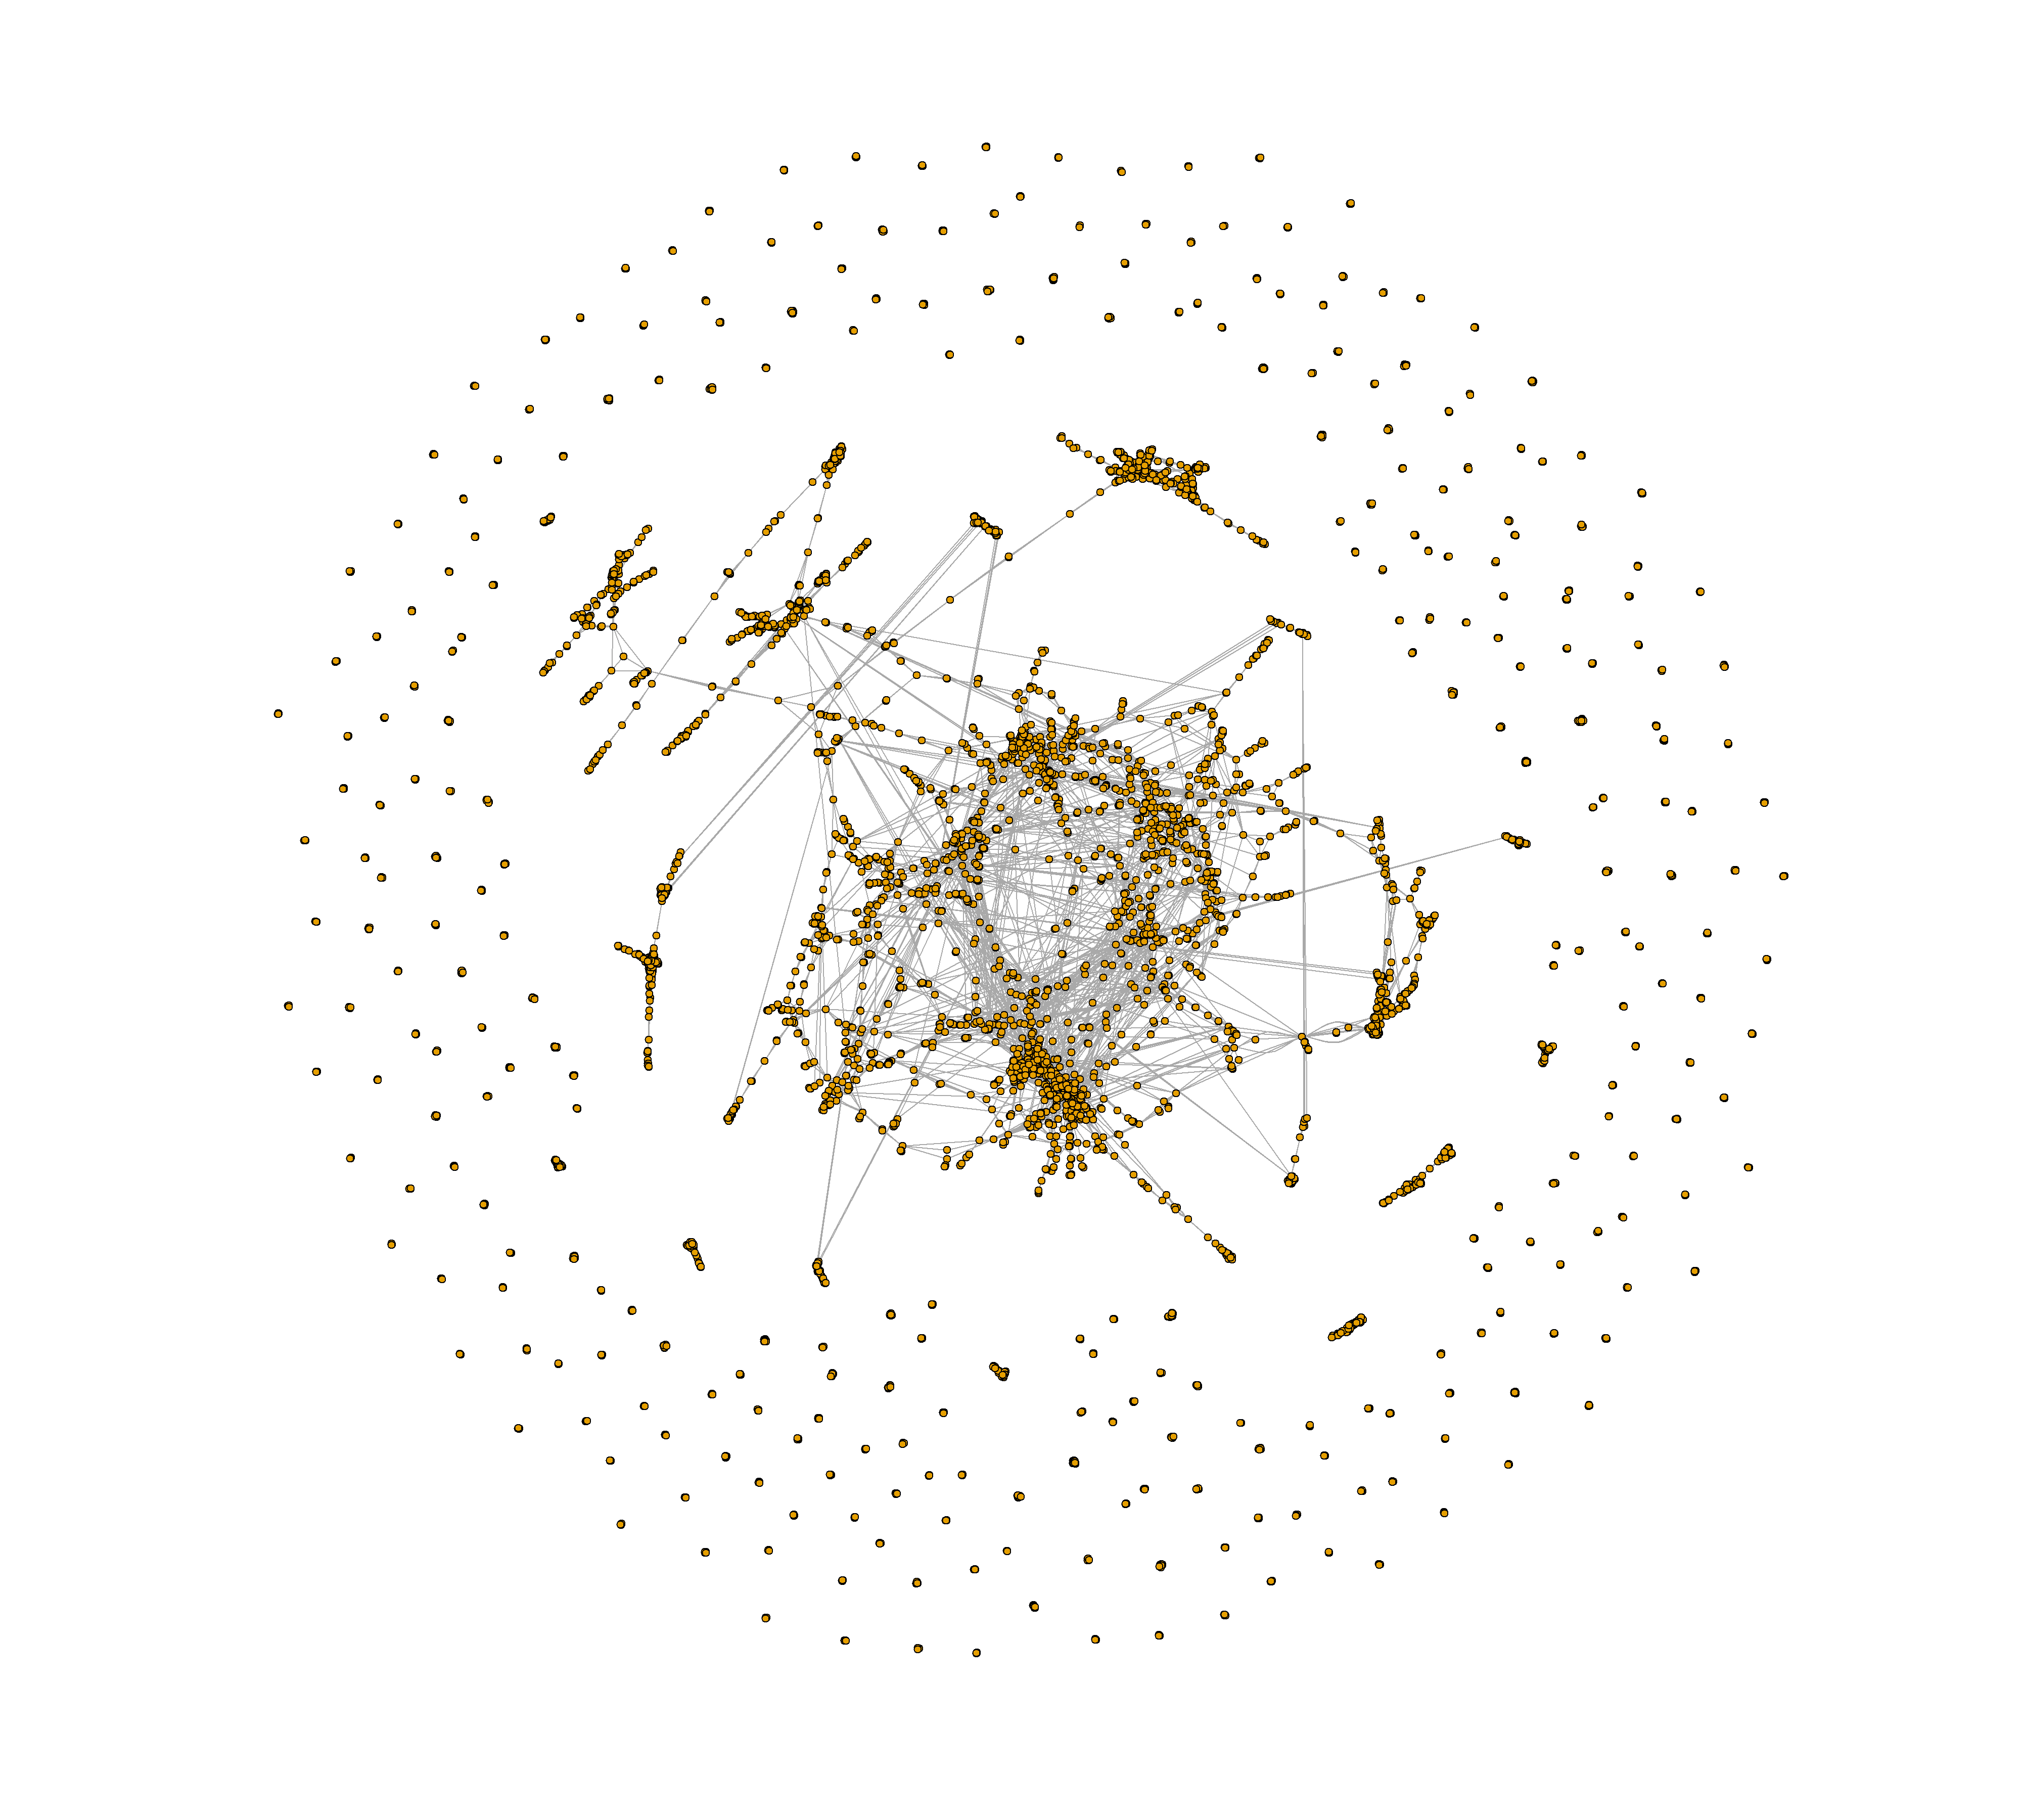

In [213]:
relations_person_len_4 <- data.frame(from=combination_matrix_person_len_4[1,],
                        to=combination_matrix_person_len_4[2,]
                        )
g_person_len_4 <- graph_from_data_frame(relations_person_len_4, directed=FALSE)
plot(g_person_len_4, vertex.size=1, vertex.label=NA)

graph #6

#### So, because there are movies with a lot of persons known for a specific movie (up to 90), happens that they worked with a lot of other persons as we can see in graph#3. Reason why there's a dense number of connections in the center of graph#4 , graph#5 and graph#6. Because of this, we will not consider movies that have more than 10 that are known for that movie. We will also compare the movies that had very good rating with very bad rating, this way if there is not common persons between those we can say that the cast does influence a rating

##### filter movies by frequency of KnownForTitle

In [ ]:
# just to recall (already runned in the begginning)
# freq_titles_df = count(cleaned_df, "knownForTitles")

In [197]:
df_less_5 = cleaned_df[cleaned_df$knownForTitles %in% freq_titles_df[freq_titles_df$freq<=10,]$knownForTitles, ]
df_less_5$knownForTitles = factor(df_less_5$knownForTitles)

##### filter movies that had very good and very bad ratings

In [177]:
# very bad
lower_3 = merged[merged$averageRating <= 3, ]

In [214]:
df_5_lower_3 = df_less_5[df_less_5$knownForTitles %in% lower_3$tconst, ]
df_5_lower_3$knownForTitles = factor(df_5_lower_3$knownForTitles) 

In [215]:
split_person_df_5_lower_3 = split(df_5_lower_3, df_5_lower_3$nconst)
length(split_person_df_5_lower_3)

[1] 691130

In [216]:
comb_matrix_person_df_5_lower_3 = c()
for( i in 1:length(split_person_df_5_lower_3)){
    if(length(split_person_df_5_lower_3[[i]][[2]]) > 1){ # does not consider movies that only one person is known for (messes with the structure)
        temp = combn(as.vector(split_person_df_5_lower_3[[i]][[2]]), 2)  # combinations without repetions with persons that worked in the same movie
                                                        # so we have the connections for the graph
        comb_matrix_person_df_5_lower_3 = cbind(comb_matrix_person_df_5_lower_3, temp)
    }
}

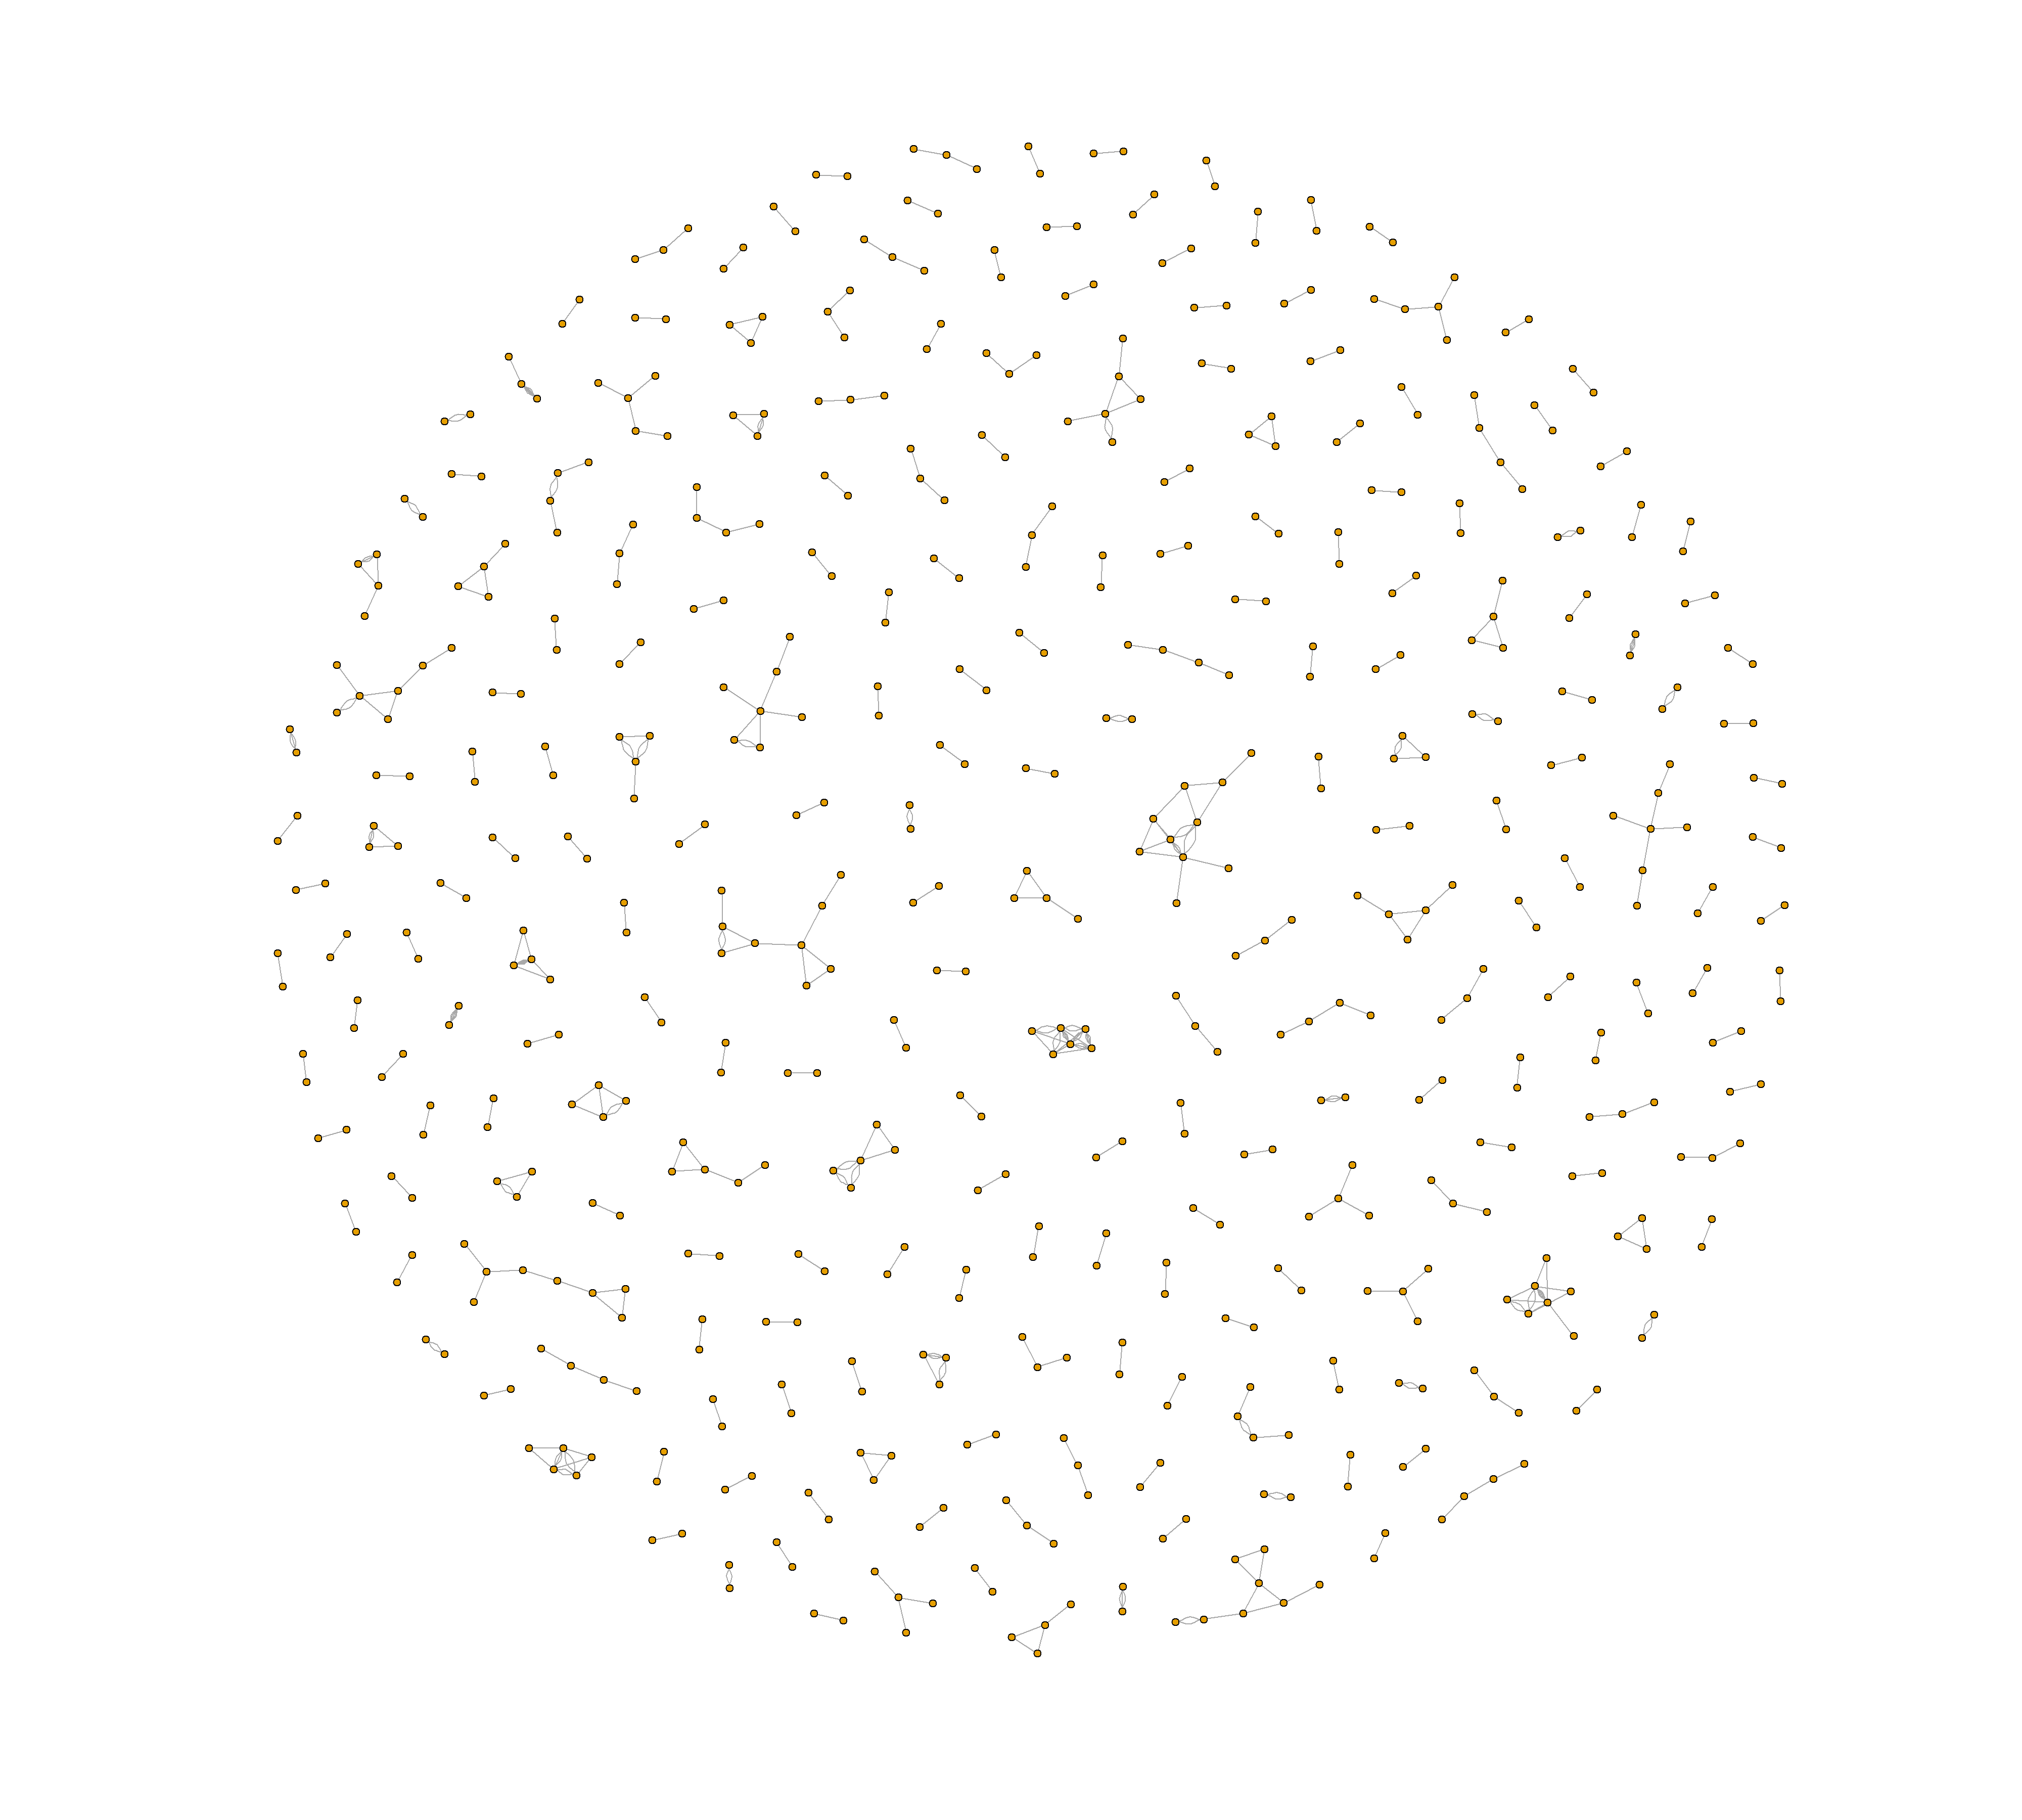

In [217]:
relations_person_df_5_lower_3 <- data.frame(from=comb_matrix_person_df_5_lower_3[1,],
                        to=comb_matrix_person_df_5_lower_3[2,]
                        )
g_person_df_5_lower_3 <- graph_from_data_frame(relations_person_df_5_lower_3, directed=FALSE)
plot(g_person_df_5_lower_3, vertex.size=1, vertex.label=NA)

In [ ]:
# very good
# just to recall
# higher_7 = merged[merged$averageRating >= 7, ]

In [202]:
df_5_higher_7 = df_less_5[df_less_5$knownForTitles %in% higher_7$tconst, ]
df_5_higher_7$knownForTitles = factor(df_5_higher_7$knownForTitles) 

In [203]:
split_person_df_5_higher_7 = split(df_5_higher_7, df_5_higher_7$nconst)
length(split_person_df_5_higher_7)

[1] 691130

In [204]:
comb_matrix_person_df_5_higher_7 = c()
for( i in 1:length(split_person_df_5_higher_7)){
    if(length(split_person_df_5_higher_7[[i]][[2]]) > 1){ # does not consider movies that only one person is known for (messes with the structure)
        temp = combn(as.vector(split_person_df_5_higher_7[[i]][[2]]), 2)  # combinations without repetions with persons that worked in the same movie
                                                        # so we have the connections for the graph
        comb_matrix_person_df_5_higher_7 = cbind(comb_matrix_person_df_5_higher_7, temp)
    }
}

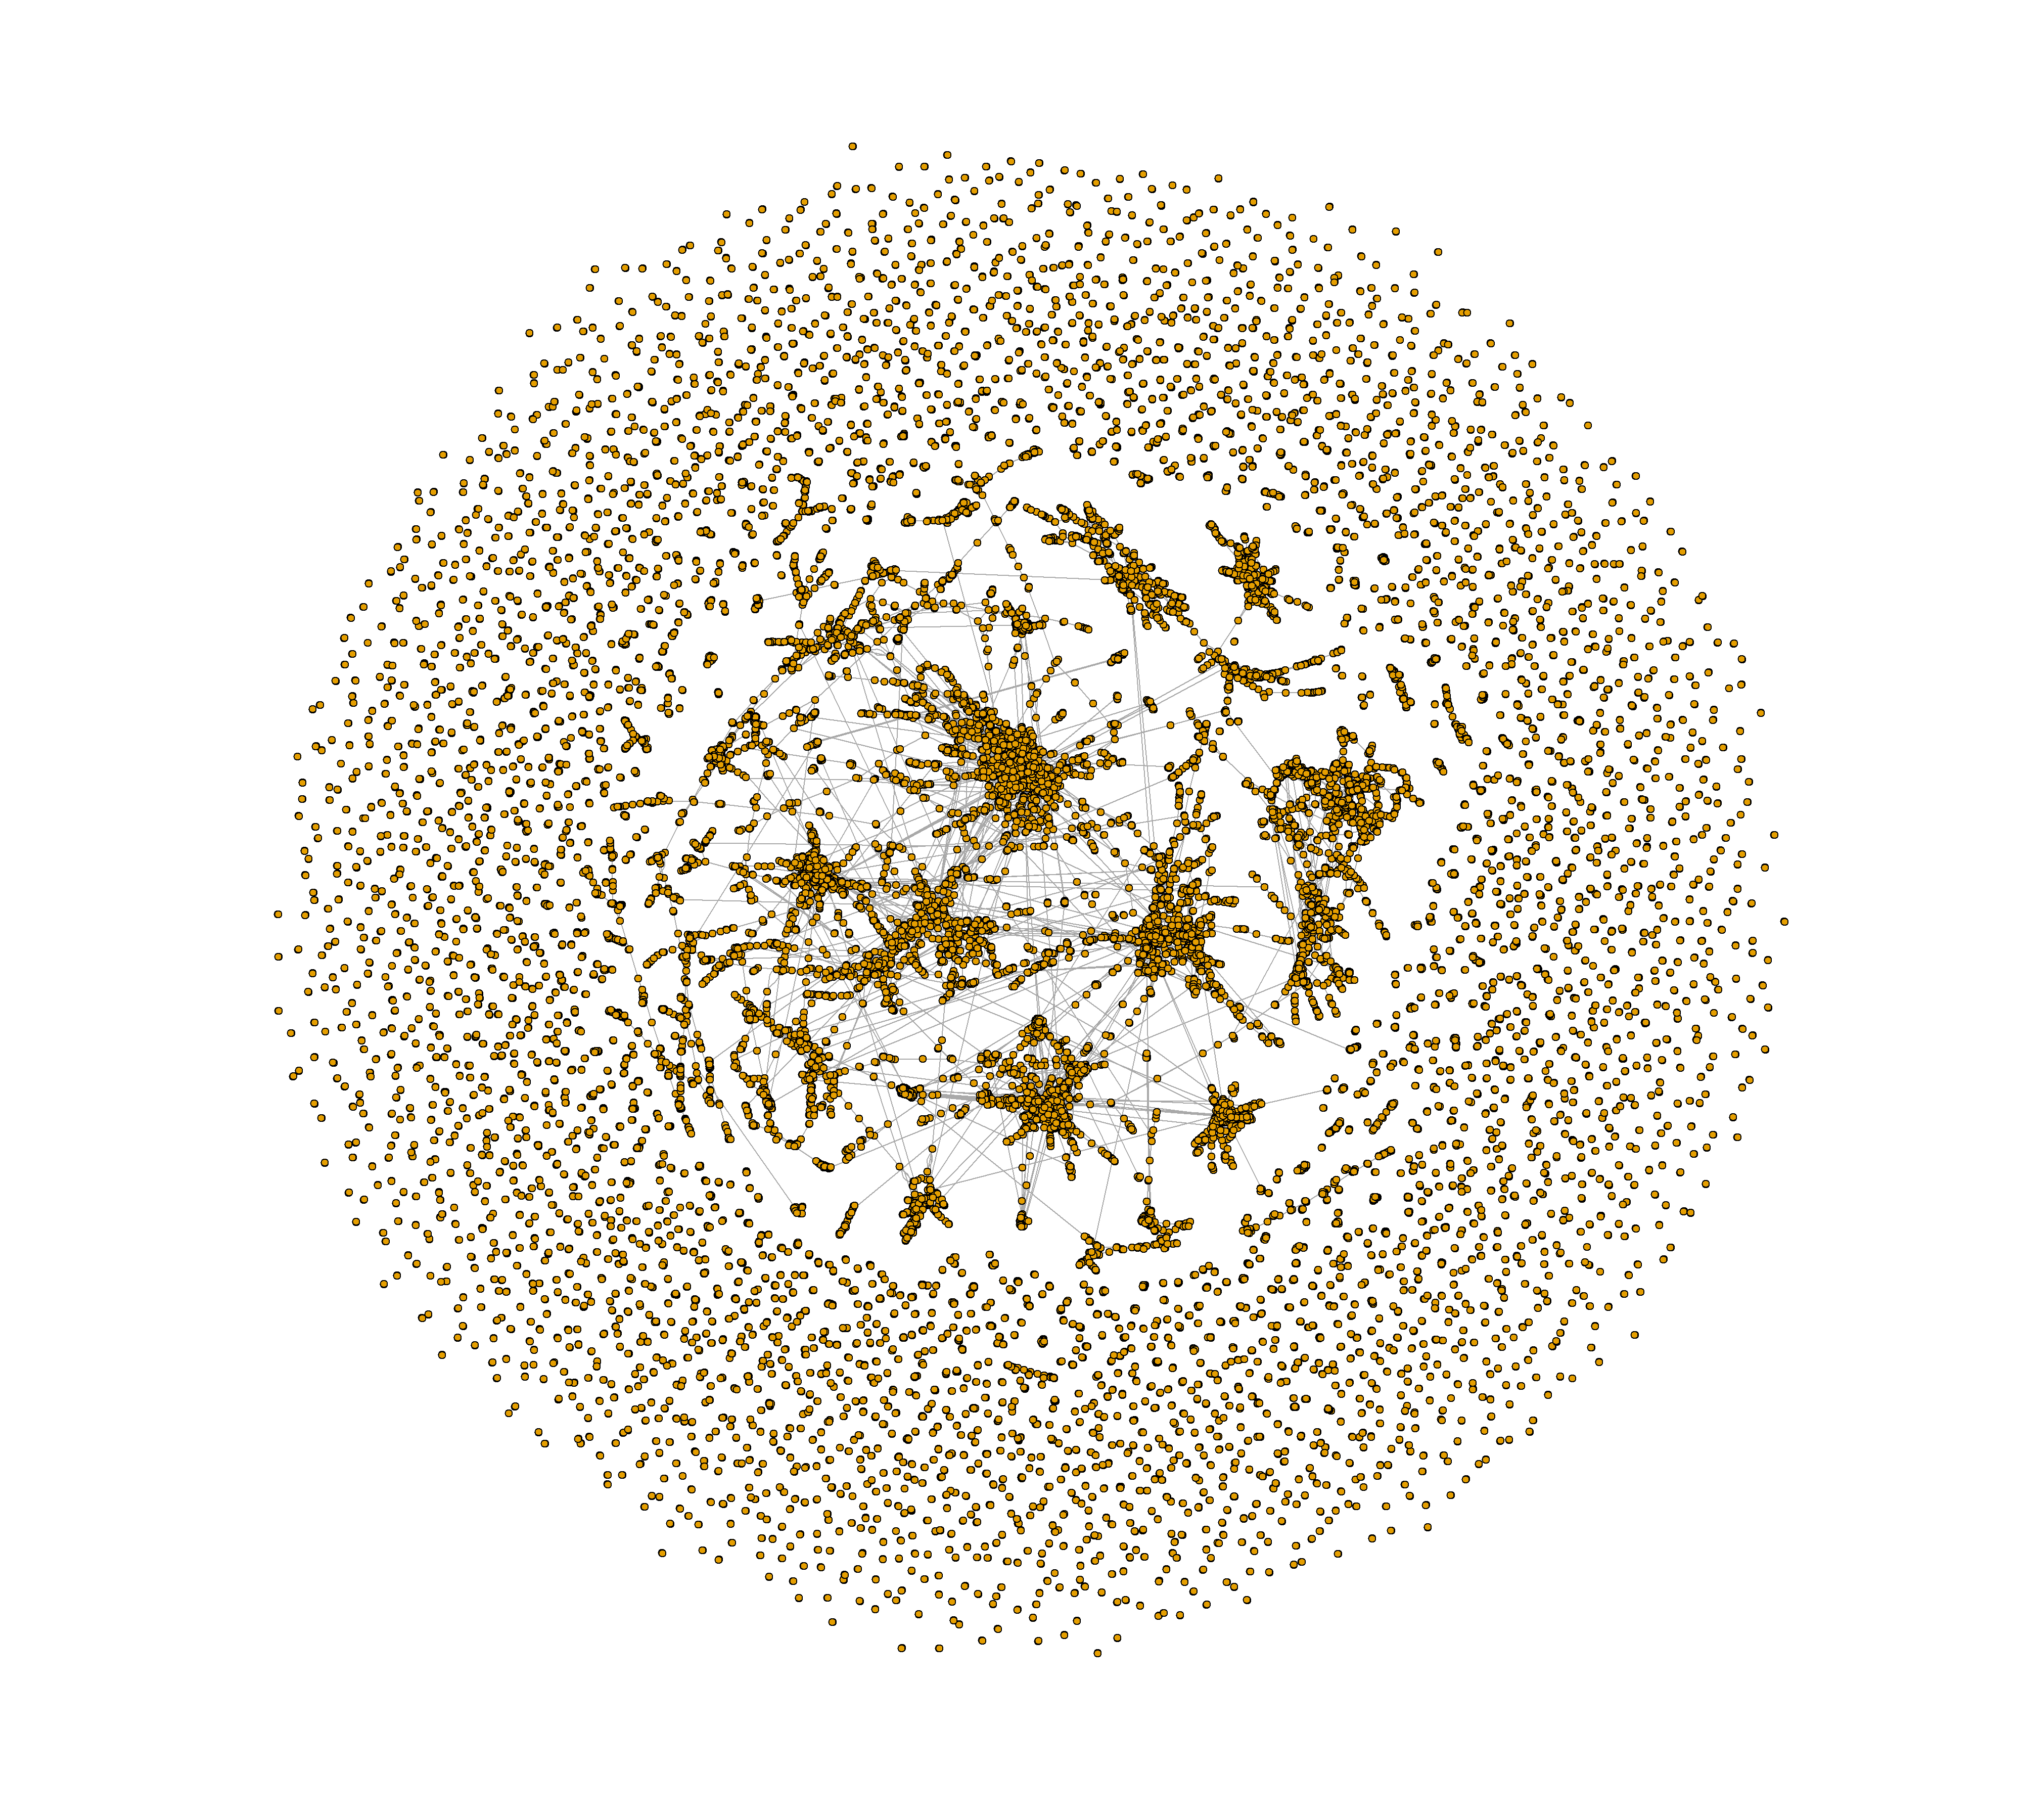

In [205]:
relations_person_df_5_higher_7 <- data.frame(from=comb_matrix_person_df_5_higher_7[1,],
                        to=comb_matrix_person_df_5_higher_7[2,]
                        )
g_person_df_5_higher_7 <- graph_from_data_frame(relations_person_df_5_higher_7, directed=FALSE)
plot(g_person_df_5_higher_7, vertex.size=1, vertex.label=NA)

In [192]:
# very bad and very good
lower_3_higher_7 = merged[merged$averageRating <=3 | merged$averageRating >=7, ]

In [198]:
df_5_l3_h7 = df_less_5[df_less_5$knownForTitles %in% lower_3_higher_7$tconst, ]
df_5_l3_h7$knownForTitles = factor(df_5_l3_h7$knownForTitles) 

In [199]:
split_person_df_5_l3_h7 = split(df_5_l3_h7, df_5_l3_h7$nconst)
length(split_person_df_5_l3_h7)

[1] 691130

In [200]:
comb_matrix_person_df_5_l3_h7 = c()
for( i in 1:length(split_person_df_5_l3_h7)){
    if(length(split_person_df_5_l3_h7[[i]][[2]]) > 1){ # does not consider movies that only one person is known for (messes with the structure)
        temp = combn(as.vector(split_person_df_5_l3_h7[[i]][[2]]), 2)  # combinations without repetions with persons that worked in the same movie
                                                        # so we have the connections for the graph
        comb_matrix_person_df_5_l3_h7 = cbind(comb_matrix_person_df_5_l3_h7, temp)
    }
}

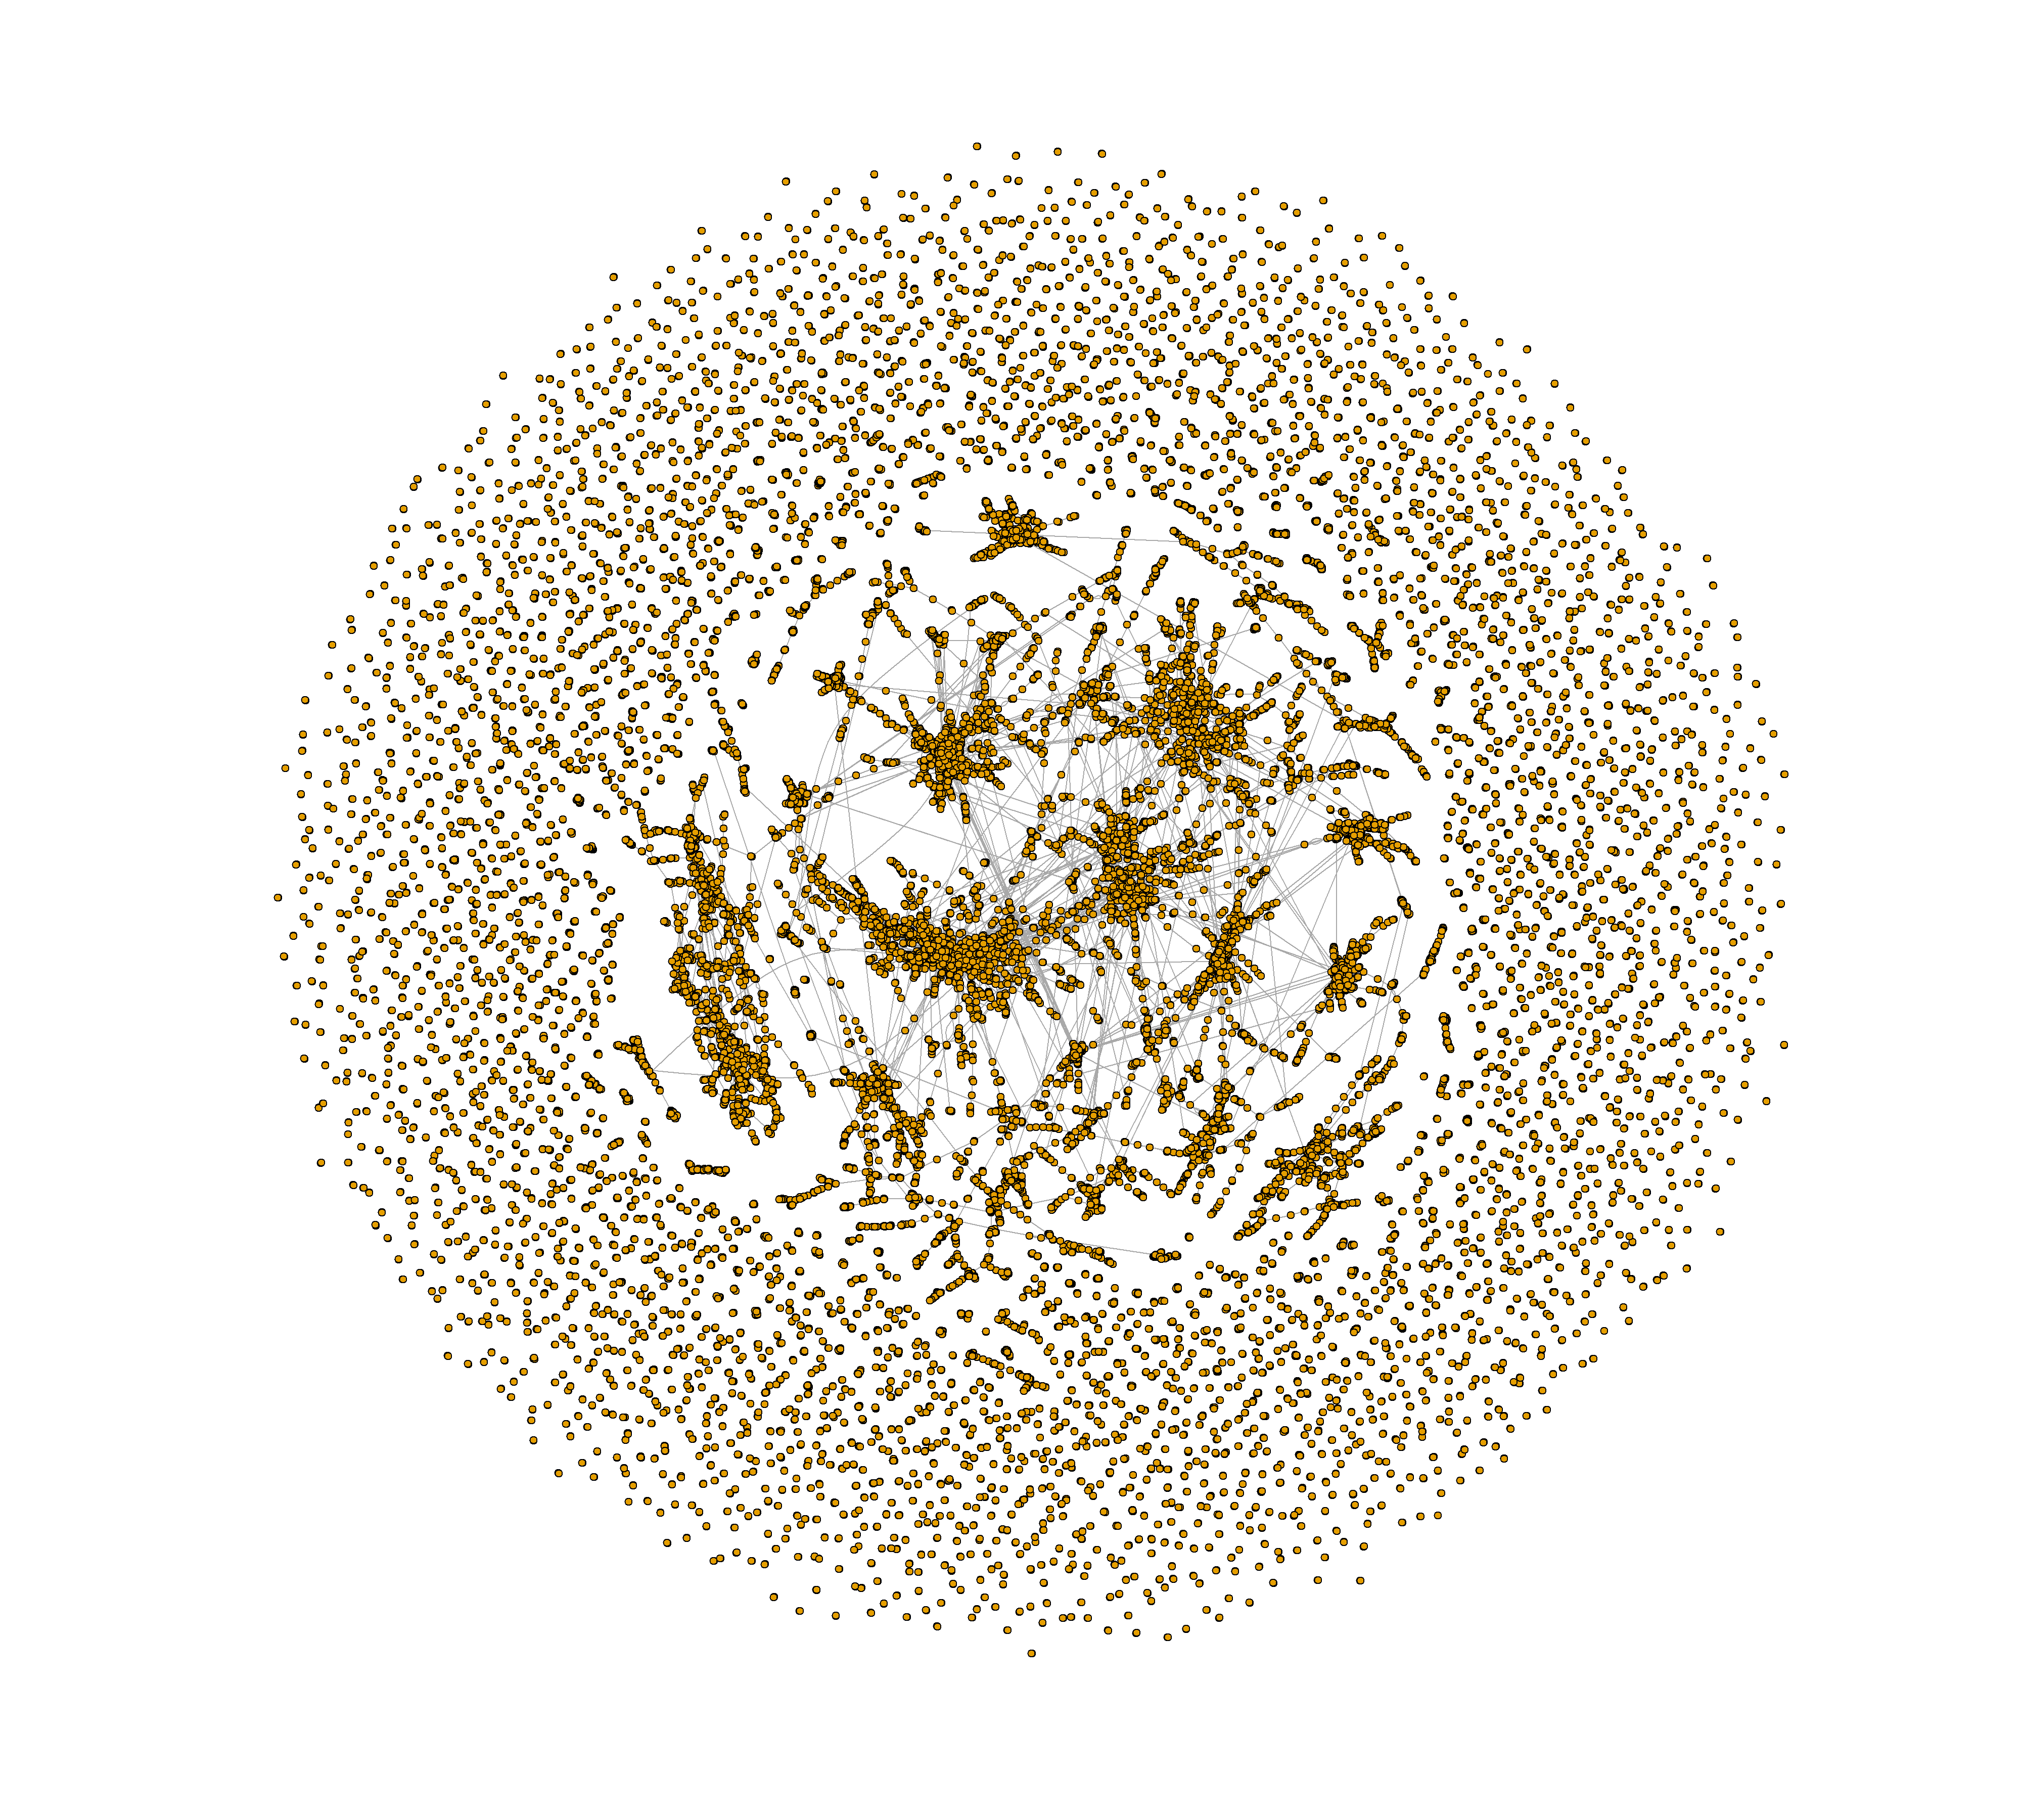

In [201]:
relations_person_df_5_l3_h7 <- data.frame(from=comb_matrix_person_df_5_l3_h7[1,],
                        to=comb_matrix_person_df_5_l3_h7[2,]
                        )
g_person_df_5_l3_h7 <- graph_from_data_frame(relations_person_df_5_l3_h7, directed=FALSE)
plot(g_person_df_5_l3_h7, vertex.size=1, vertex.label=NA)

#### Graphs of people that are known for n (2, 3 or 4) movies. People that are known for the same amount of movies worked together?